### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 30dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/110619/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream30deg_wind_speeds.csv',
  'Bent_cylinder_L100_downstream30deg_y0.csv',
  'Bent_cylinder_L100_downstream30deg_y1.csv',
  'Bent_cylinder_L100_downstream30deg_y10.csv',
  'Bent_cylinder_L100_downstream30deg_y2.csv',
  'Bent_cylinder_L100_downstream30deg_y3.csv',
  'Bent_cylinder_L100_downstream30deg_y4.csv',
  'Bent_cylinder_L100_downstream30deg_y5.csv',
  'Bent_cylinder_L100_downstream30deg_y6.csv',
  'Bent_cylinder_L100_downstream30deg_y7.csv',
  'Bent_cylinder_L100_downstream30deg_y8.csv',
  'Bent_cylinder_L100_downstream30deg_y9.csv',
  'Bent_cylinder_L100_downstream30deg_yminus1.csv',
  'Bent_cylinder_L100_downstream30deg_yminus2.csv'],
 ['Bent_cylinder_L100_upstream30deg_wind_speeds.csv',
  'Bent_cylinder_L100_upstream30deg_y0.csv',
  'Bent_cylinder_L100_upstream30deg_y1.csv',
  'Bent_cylinder_L100_upstream30deg_y10.csv',
  'Bent_cylinder_L100_upstream30deg_y2.csv',
  'Bent_cylinder_L100_upstream30deg_y3.csv',
  'Bent_cylinder_L100_upstream30deg_y4.cs

#### Velocidades DownStream

In [5]:
velocity = pd.read_csv(path_mat + dstream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00113   
1        0.00007          0.0              0.0  0.0         inf    0.00112   
2        0.00007          0.0              0.0  0.0         inf    0.00113   
3        0.00007          0.0              0.0  0.0         inf    0.00114   
4        0.00007          0.0              0.0  0.0         inf    0.00113   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.69050   1.06943  101592.0  20.0          0.0         inf   
1         inf   1.67199   1.66413  101592.0  20.0          0.0         inf   
2         inf   4.22733   2.64609  101592.0  20.0          0.0         inf   
3         inf   8.67930   3.79152  101592.0  20.0          0.0         inf   
4         inf  13.89963   4.79814  101592.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00116         inf  
1    0.00115         inf  
2    0.00115         inf  
3    0.00114         inf  
4    0.00113         inf

In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  208.000000
mean     7.429293
std      4.214736
min      0.918426
25%      3.888913
50%      7.400043
75%     10.884878
max     14.402033

In [7]:
df_prueba = pd.read_csv(path_mat + dstream[1])
df_prueba.describe()

0.61194
count  1.599999e+06
mean   7.508863e+00
std    4.511043e+00
min    5.556400e-01
25%    3.633340e+00
50%    7.338430e+00
75%    1.113404e+01
max    2.607278e+01

## Graficas Downstream

## y-2

Velocity:  0.9184264839999999
Max Frequency value:  78.125


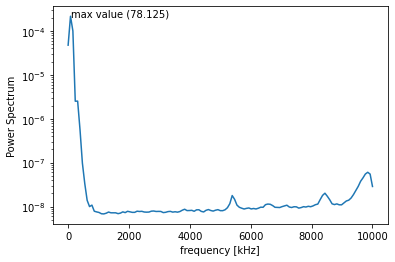


Velocity:  1.429154844
Max Frequency value:  156.25


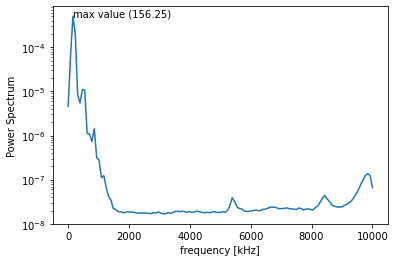


Velocity:  2.272462092
Max Frequency value:  312.5


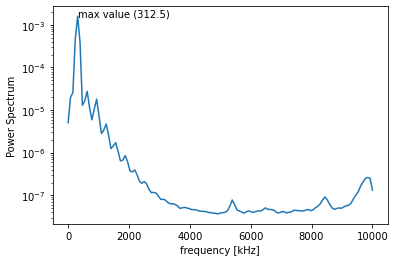


Velocity:  3.256157376
Max Frequency value:  468.75


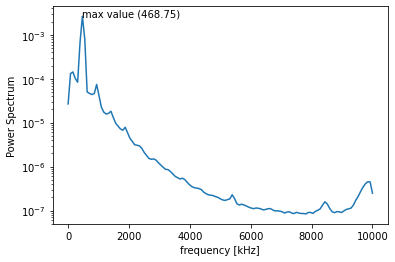


Velocity:  4.120642632
Max Frequency value:  625.0


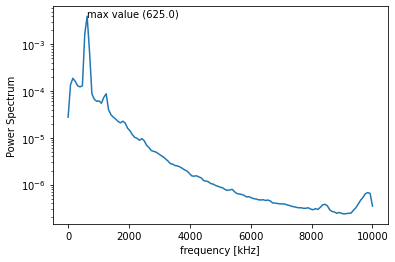


Velocity:  5.085822188
Max Frequency value:  781.25


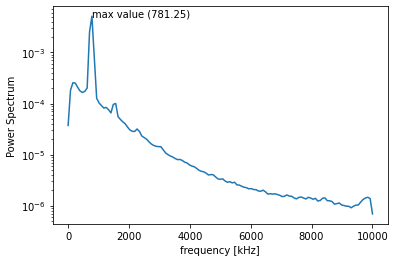


Velocity:  6.0683752680000005
Max Frequency value:  937.5


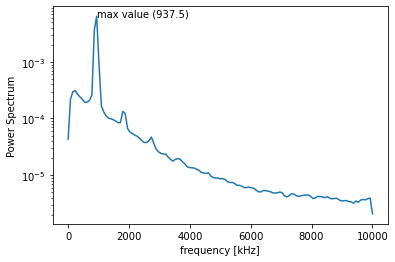


Velocity:  6.918269512
Max Frequency value:  1015.625


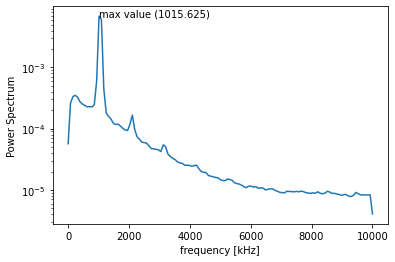


Velocity:  7.793446828000001
Max Frequency value:  1171.875


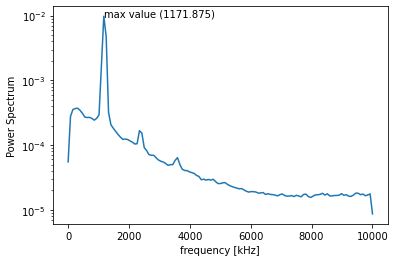


Velocity:  8.771516972
Max Frequency value:  1328.125


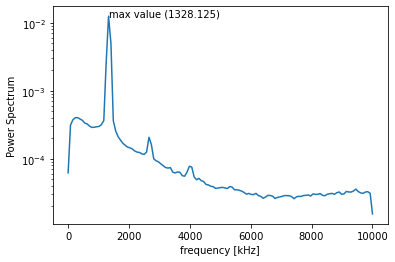


Velocity:  9.66094178
Max Frequency value:  1484.375


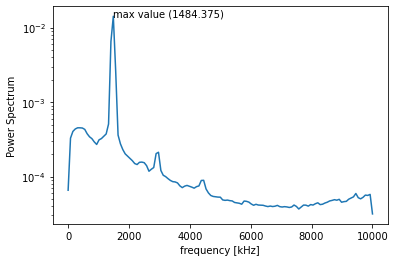


Velocity:  10.692918800000001
Max Frequency value:  1640.625


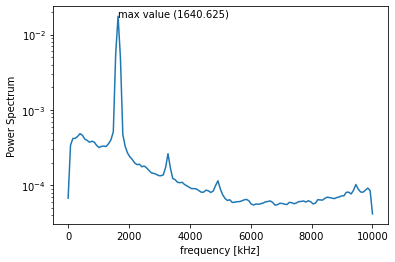


Velocity:  11.557103476000002
Max Frequency value:  1796.875


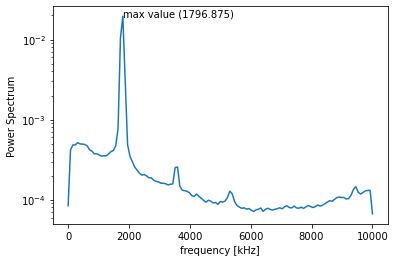


Velocity:  12.491246
Max Frequency value:  1953.125


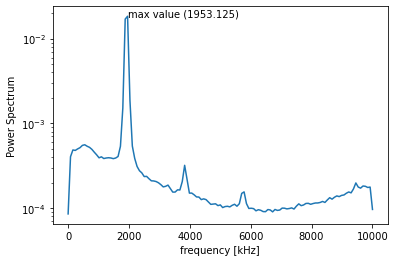


Velocity:  13.37787112
Max Frequency value:  2031.25


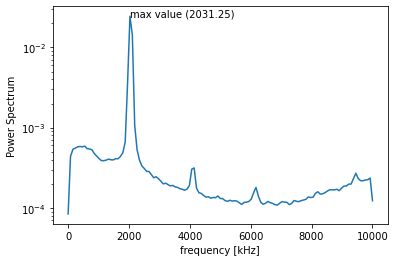


Velocity:  14.35029036
Max Frequency value:  2187.5


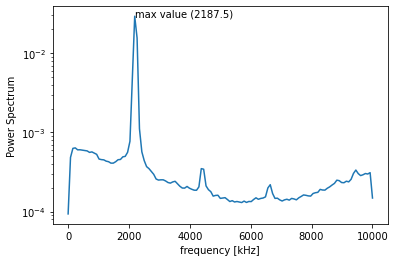

In [8]:
df = pd.read_csv(path_mat + dstream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

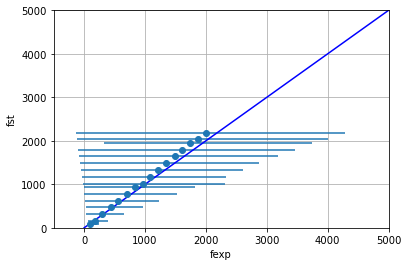

In [9]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.989801352
Max Frequency value:  78.125


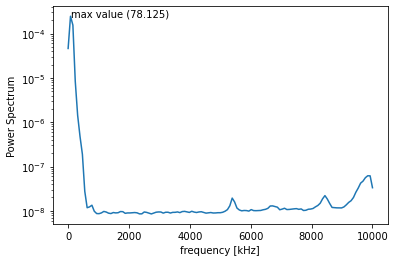


Velocity:  1.371787004
Max Frequency value:  156.25


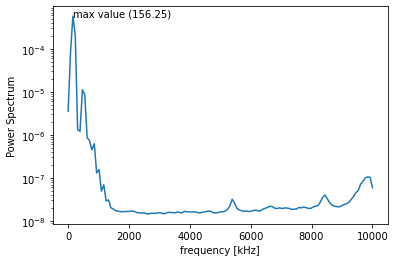


Velocity:  2.3656161279999997
Max Frequency value:  312.5


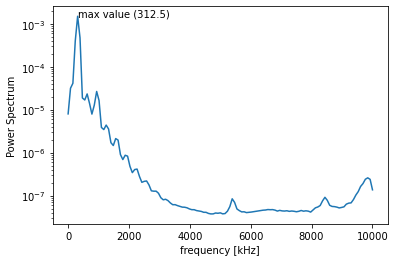


Velocity:  3.281363156
Max Frequency value:  468.75


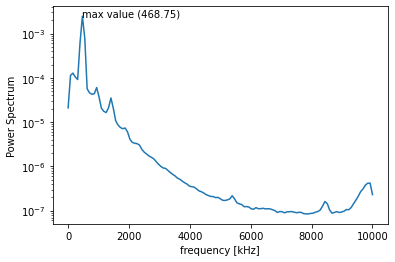


Velocity:  4.20829176
Max Frequency value:  625.0


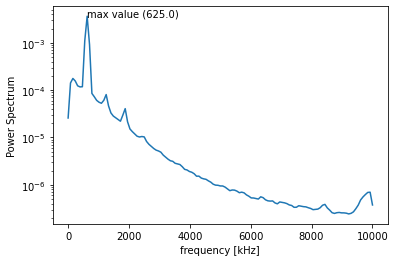


Velocity:  5.108460156
Max Frequency value:  781.25


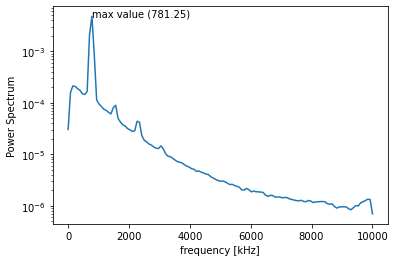


Velocity:  6.0362905
Max Frequency value:  937.5


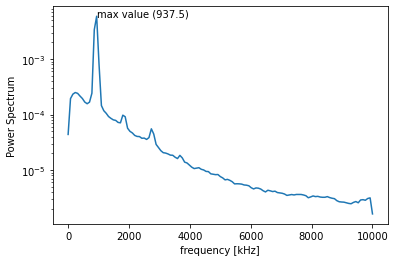


Velocity:  7.006640032
Max Frequency value:  1093.75


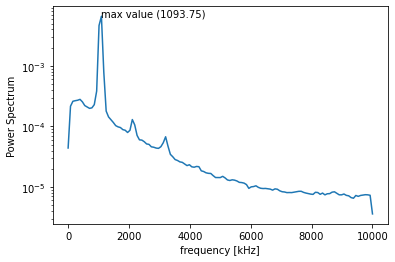


Velocity:  7.83727998
Max Frequency value:  1171.875


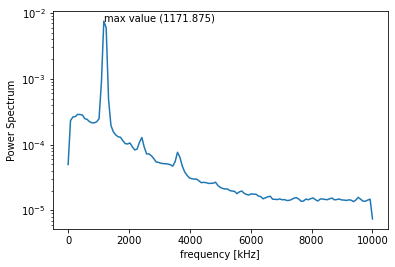


Velocity:  8.730603740000001
Max Frequency value:  1328.125


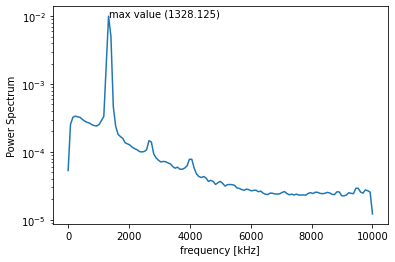


Velocity:  9.684223848
Max Frequency value:  1484.375


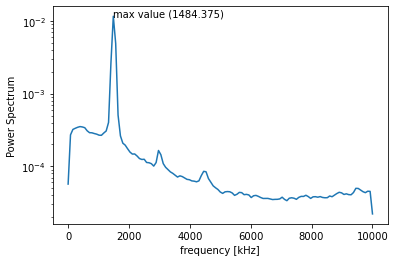


Velocity:  10.674780944
Max Frequency value:  1640.625


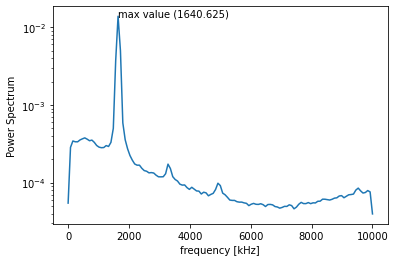


Velocity:  11.534010344
Max Frequency value:  1796.875


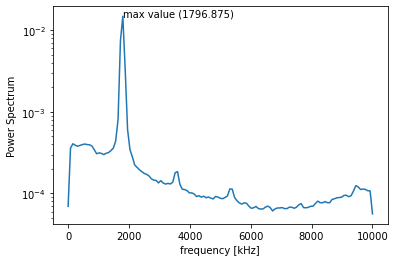


Velocity:  12.440611151999999
Max Frequency value:  1875.0


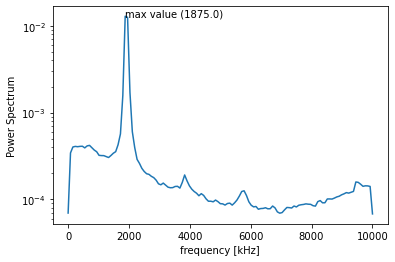


Velocity:  13.358874463999998
Max Frequency value:  2031.25


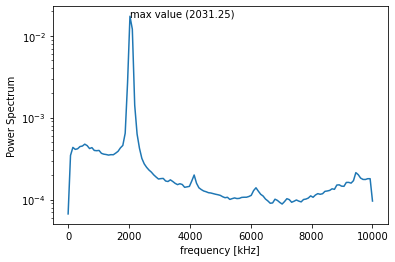


Velocity:  14.368290808000001
Max Frequency value:  2187.5


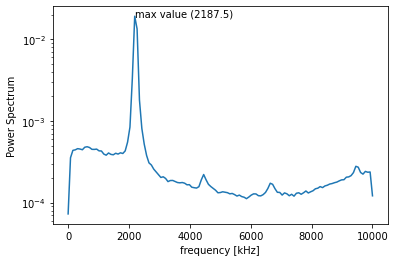

In [10]:
df1 = pd.read_csv(path_mat + dstream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

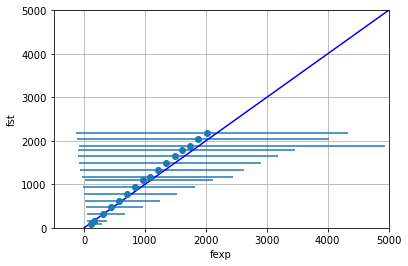

In [11]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.9789976480000001
Max Frequency value:  78.125


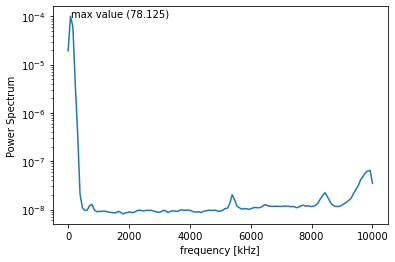


Velocity:  1.430915384
Max Frequency value:  156.25


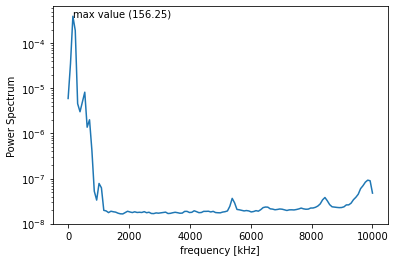


Velocity:  2.361468124
Max Frequency value:  312.5


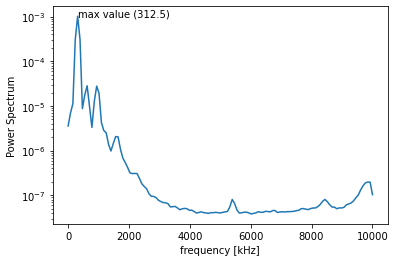


Velocity:  3.29422798
Max Frequency value:  468.75


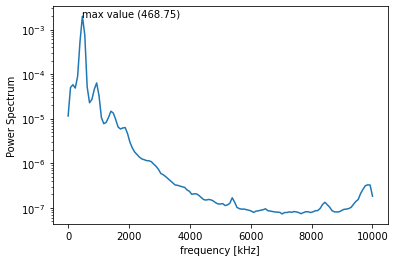


Velocity:  4.1654719920000005
Max Frequency value:  625.0


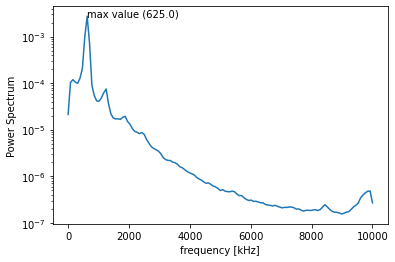


Velocity:  5.097982796
Max Frequency value:  781.25


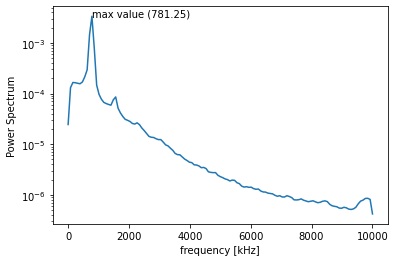


Velocity:  6.035062416
Max Frequency value:  937.5


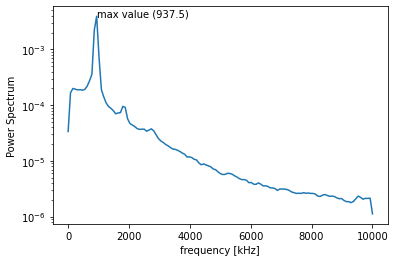


Velocity:  6.92158448
Max Frequency value:  1093.75


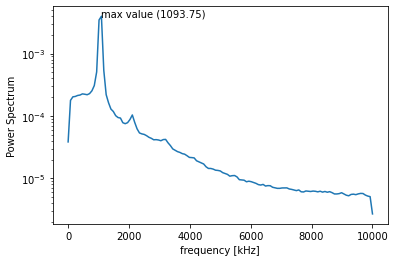


Velocity:  7.829713952
Max Frequency value:  1171.875


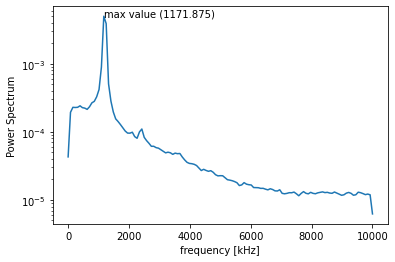


Velocity:  8.719430752
Max Frequency value:  1328.125


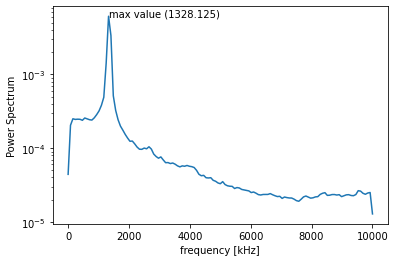


Velocity:  9.72681174
Max Frequency value:  1484.375


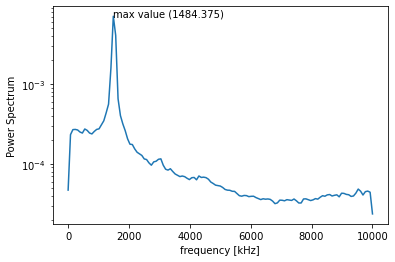


Velocity:  10.636272352
Max Frequency value:  1640.625


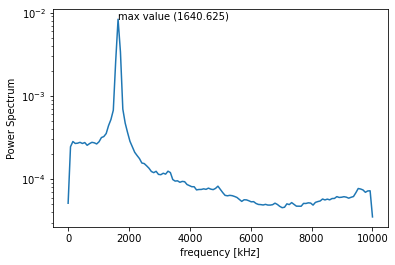


Velocity:  11.480283816000002
Max Frequency value:  1796.875


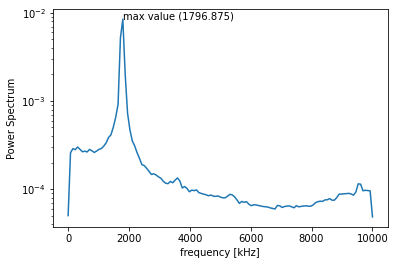


Velocity:  12.419699372
Max Frequency value:  1953.125


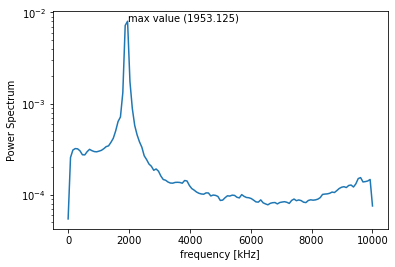


Velocity:  13.37933108
Max Frequency value:  2109.375


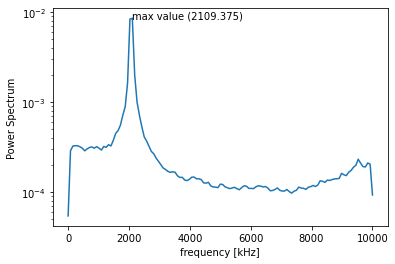


Velocity:  14.375109680000001
Max Frequency value:  2187.5


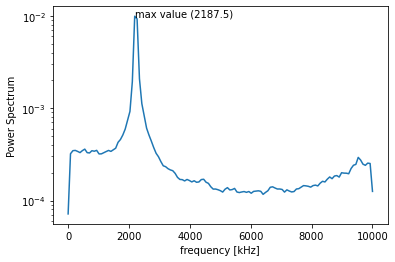

In [12]:
df2 = pd.read_csv(path_mat + dstream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

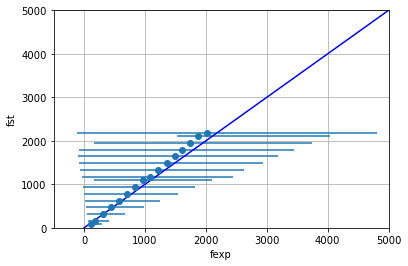

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.996542932
Max Frequency value:  78.125


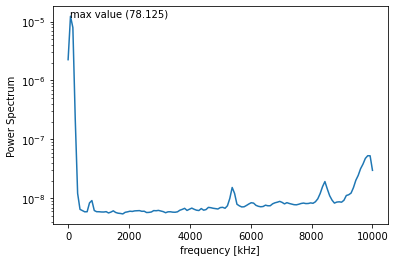


Velocity:  1.4003335160000001
Max Frequency value:  156.25


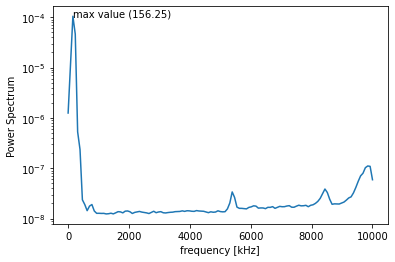


Velocity:  2.36195764
Max Frequency value:  312.5


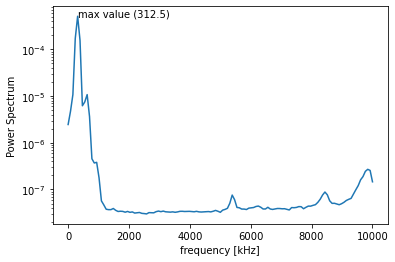


Velocity:  3.257711804
Max Frequency value:  468.75


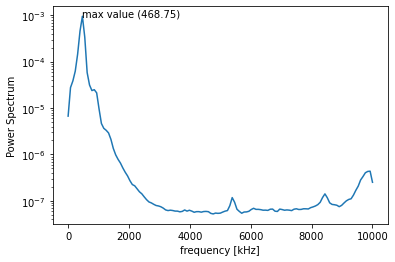


Velocity:  4.130020728
Max Frequency value:  625.0


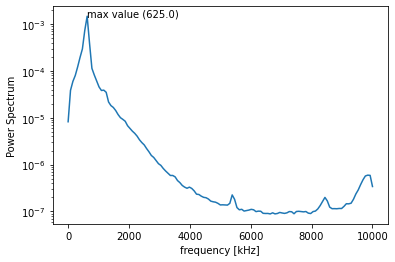


Velocity:  5.084602692
Max Frequency value:  781.25


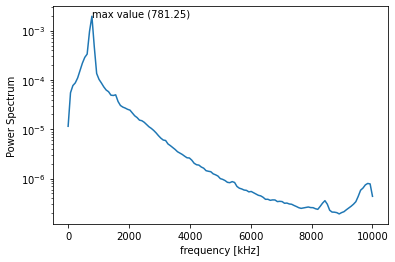


Velocity:  6.0313867519999995
Max Frequency value:  937.5


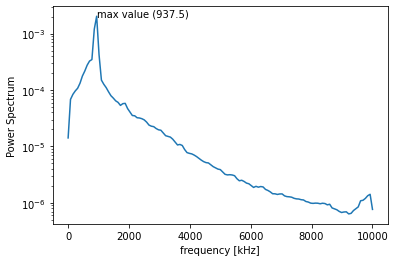


Velocity:  6.965391868000001
Max Frequency value:  1093.75


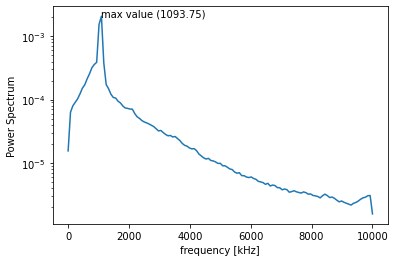


Velocity:  7.863189976
Max Frequency value:  1171.875


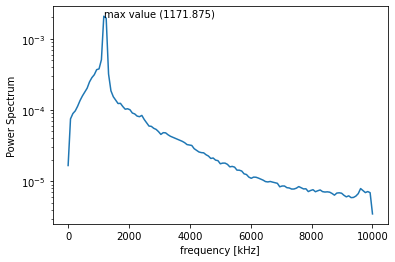


Velocity:  8.73511244
Max Frequency value:  1328.125


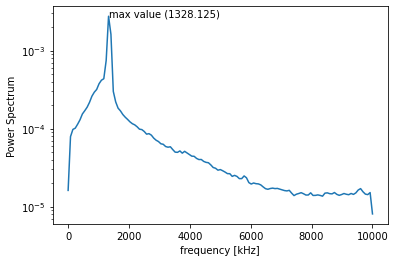


Velocity:  9.73548562
Max Frequency value:  1484.375


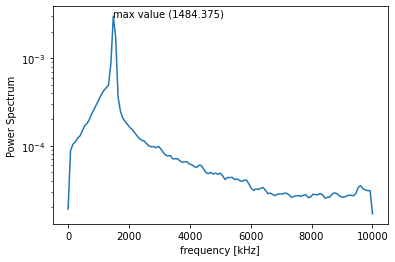


Velocity:  10.664174764
Max Frequency value:  1640.625


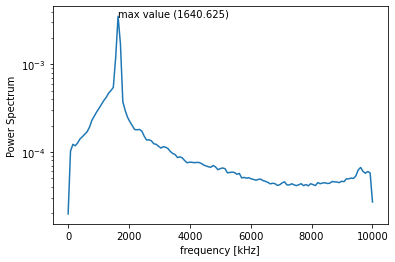


Velocity:  11.562393684
Max Frequency value:  1796.875


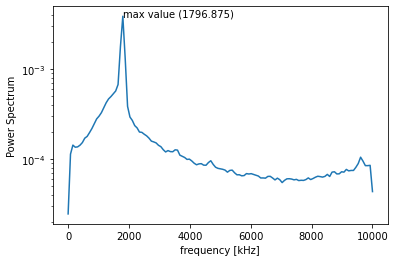


Velocity:  12.46943248
Max Frequency value:  1953.125


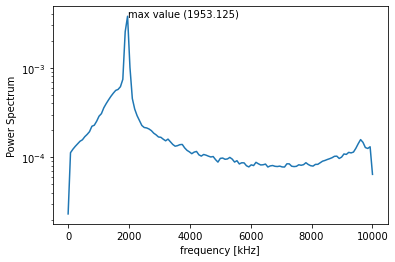


Velocity:  13.39199838
Max Frequency value:  2109.375


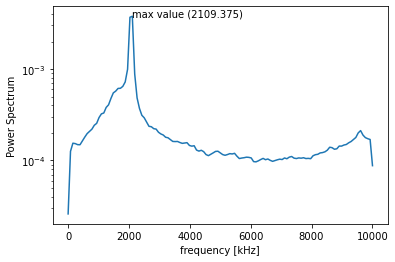


Velocity:  14.359101648000001
Max Frequency value:  2187.5


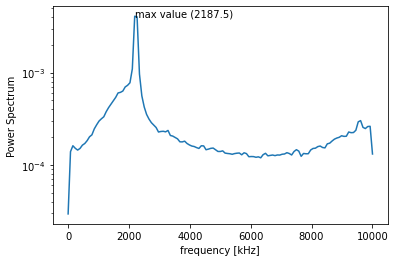

In [14]:
df3 = pd.read_csv(path_mat + dstream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

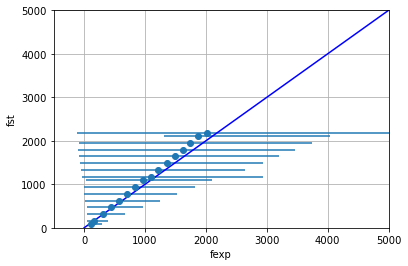

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.997856896
Max Frequency value:  9843.75


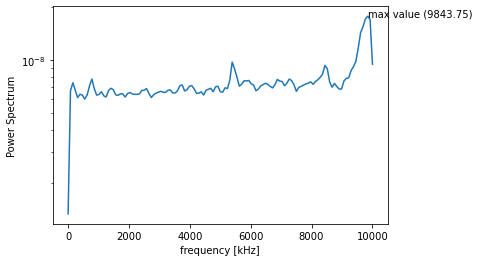


Velocity:  1.391032712
Max Frequency value:  78.125


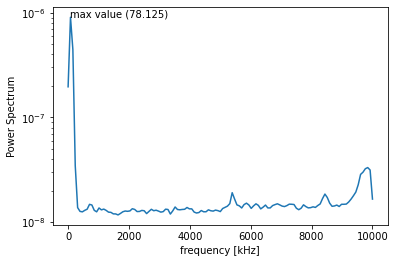


Velocity:  2.304821676
Max Frequency value:  312.5


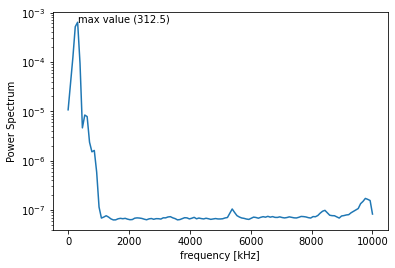


Velocity:  3.3114726840000004
Max Frequency value:  390.625


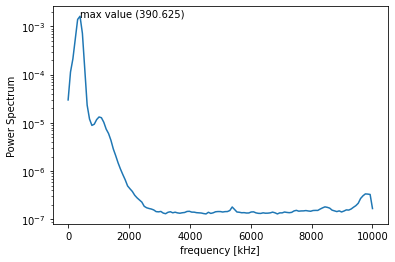


Velocity:  4.169242124
Max Frequency value:  390.625


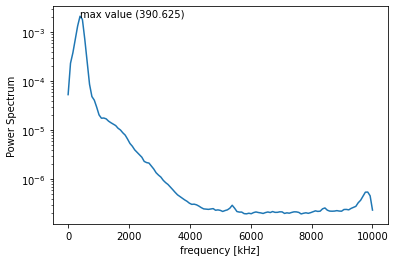


Velocity:  5.075482236
Max Frequency value:  468.75


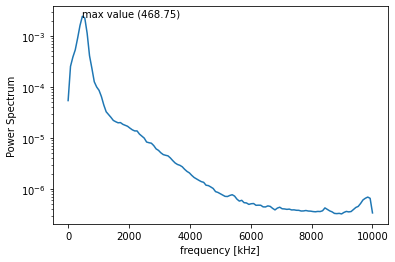


Velocity:  6.012037988
Max Frequency value:  625.0


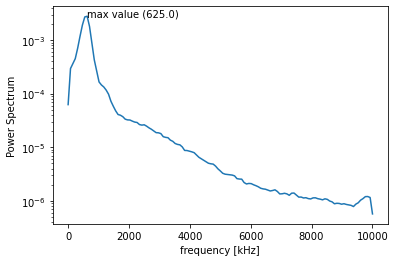


Velocity:  6.9454161800000005
Max Frequency value:  703.125


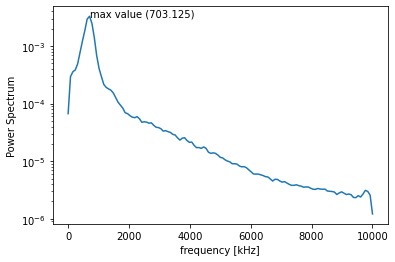


Velocity:  7.808707704
Max Frequency value:  781.25


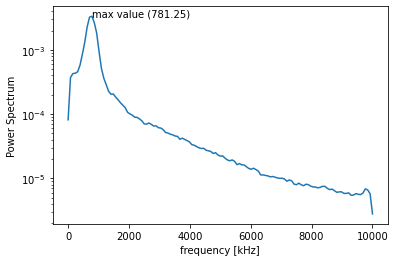


Velocity:  8.719765684
Max Frequency value:  859.375


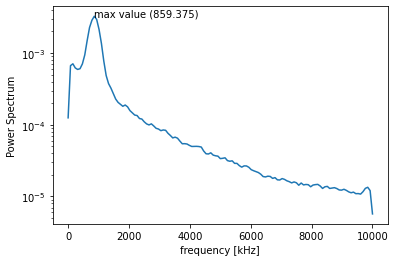


Velocity:  9.74411656
Max Frequency value:  937.5


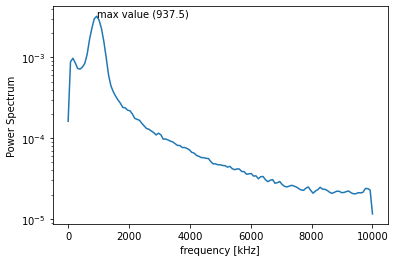


Velocity:  10.618709892
Max Frequency value:  1015.625


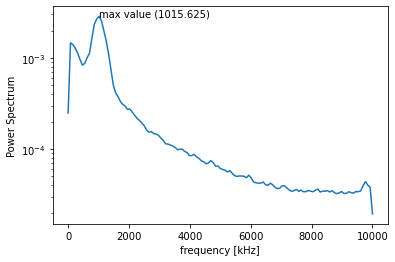


Velocity:  11.502904608000001
Max Frequency value:  1093.75


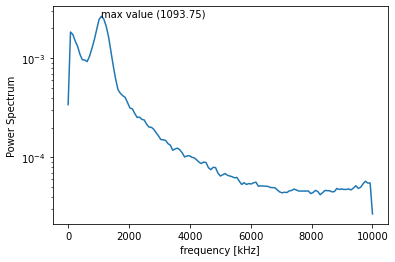


Velocity:  12.434917308000001
Max Frequency value:  1171.875


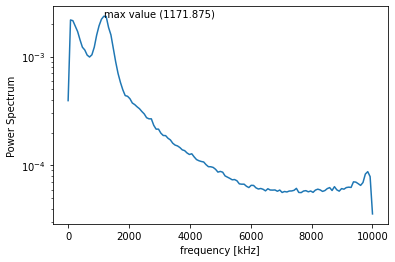


Velocity:  13.469221676
Max Frequency value:  156.25


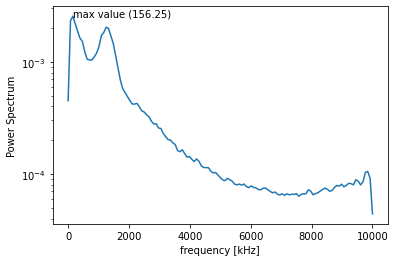


Velocity:  14.40203306
Max Frequency value:  78.125


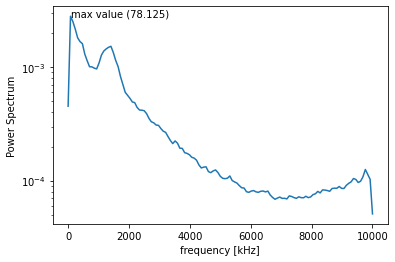

In [16]:
df4 = pd.read_csv(path_mat + dstream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

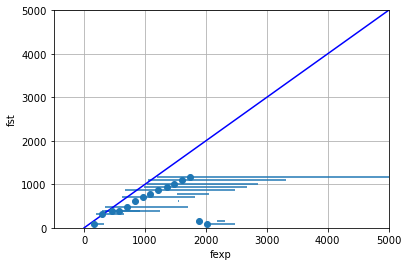

In [17]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  1.014697964
Max Frequency value:  78.125


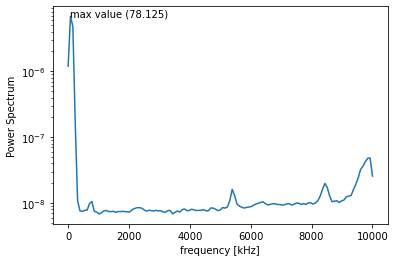


Velocity:  1.360407904
Max Frequency value:  156.25


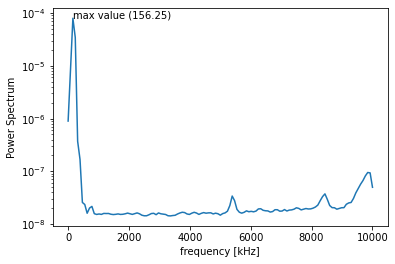


Velocity:  2.3582991520000003
Max Frequency value:  312.5


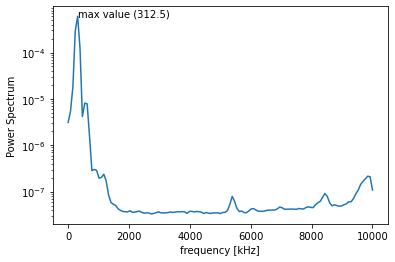


Velocity:  3.2752227359999995
Max Frequency value:  468.75


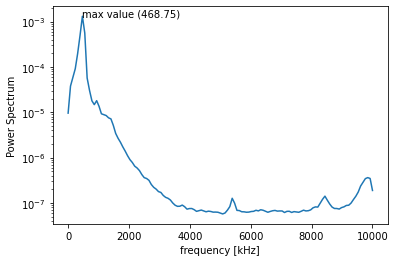


Velocity:  4.16822874
Max Frequency value:  625.0


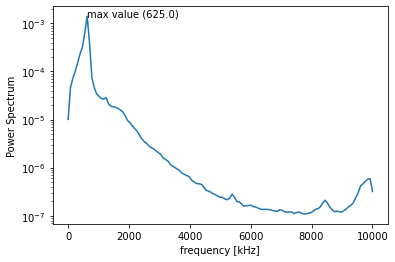


Velocity:  5.075782815999999
Max Frequency value:  781.25


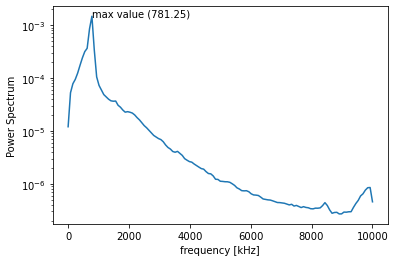


Velocity:  6.094371144
Max Frequency value:  937.5


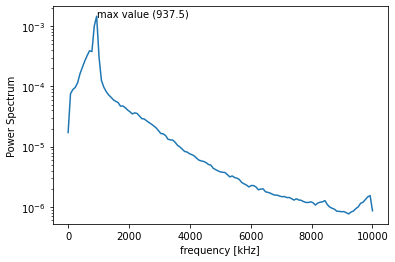


Velocity:  6.966096084
Max Frequency value:  1093.75


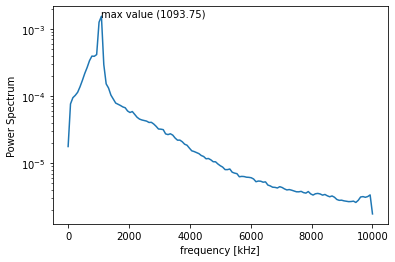


Velocity:  7.794923964
Max Frequency value:  1171.875


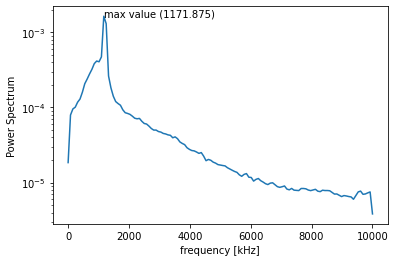


Velocity:  8.704590688000001
Max Frequency value:  1328.125


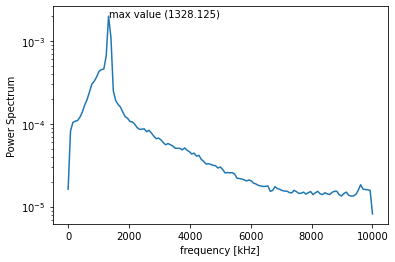


Velocity:  9.773410228
Max Frequency value:  1484.375


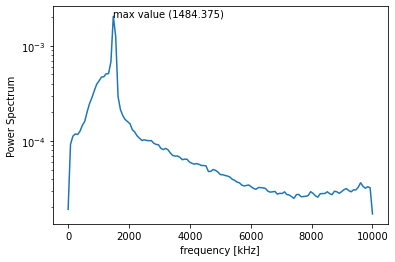


Velocity:  10.604711451999998
Max Frequency value:  1640.625


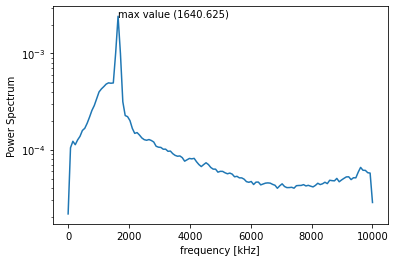


Velocity:  11.50027668
Max Frequency value:  1796.875


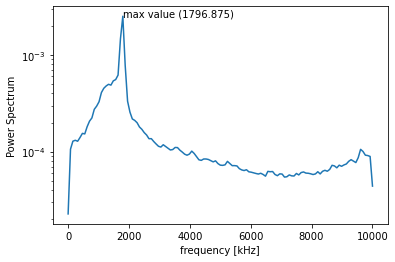


Velocity:  12.48613614
Max Frequency value:  1953.125


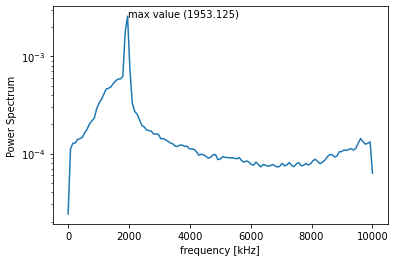


Velocity:  13.439739072
Max Frequency value:  2109.375


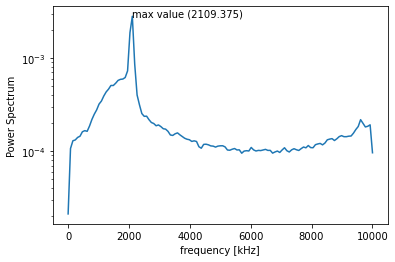


Velocity:  14.369810883999998
Max Frequency value:  2265.625


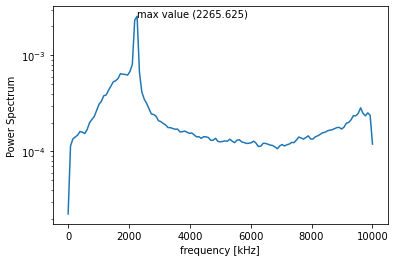

In [18]:
df5 = pd.read_csv(path_mat + dstream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

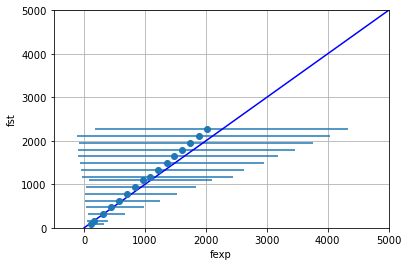

In [19]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  1.015470884
Max Frequency value:  78.125


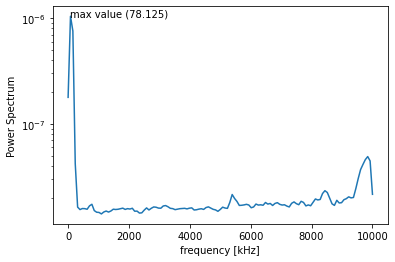


Velocity:  1.3906376639999998
Max Frequency value:  156.25


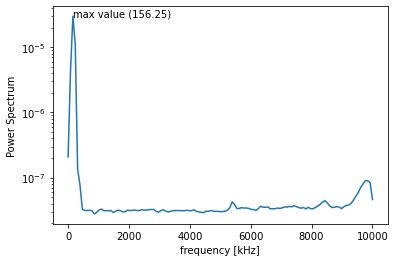


Velocity:  2.369377672
Max Frequency value:  312.5


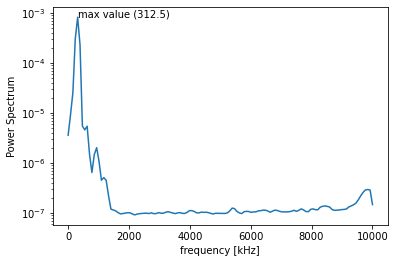


Velocity:  3.289349996
Max Frequency value:  468.75


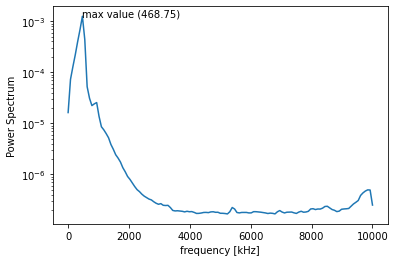


Velocity:  4.1507092199999995
Max Frequency value:  625.0


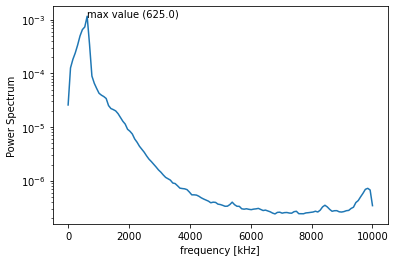


Velocity:  5.084156116
Max Frequency value:  781.25


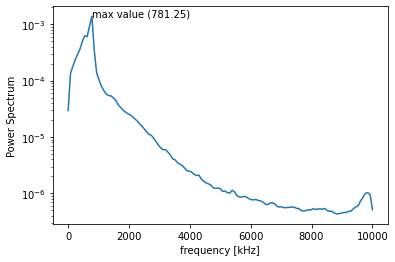


Velocity:  6.010191568000001
Max Frequency value:  937.5


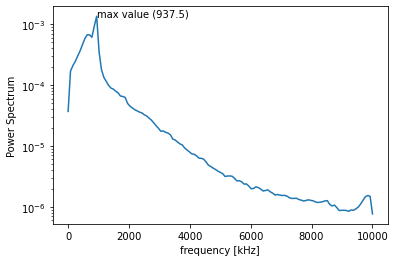


Velocity:  6.928523584000001
Max Frequency value:  1093.75


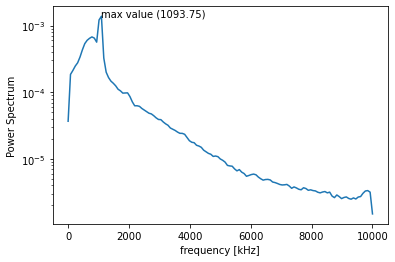


Velocity:  7.796194988000001
Max Frequency value:  1171.875


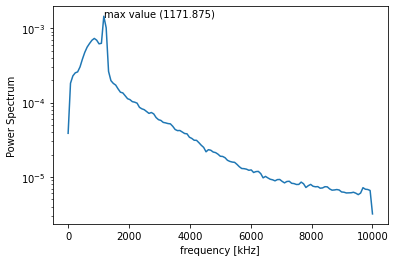


Velocity:  8.789551772
Max Frequency value:  1328.125


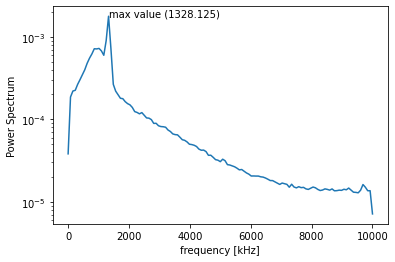


Velocity:  9.68369998
Max Frequency value:  1484.375


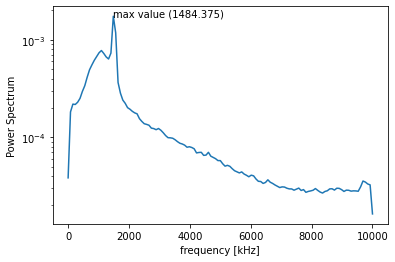


Velocity:  10.608679108
Max Frequency value:  1640.625


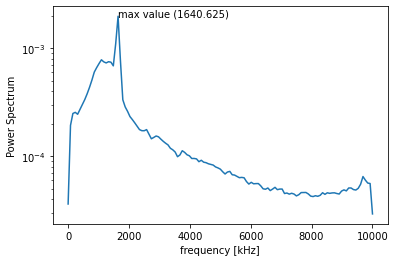


Velocity:  11.586337028
Max Frequency value:  1796.875


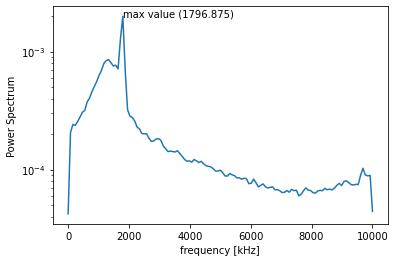


Velocity:  12.508567996000002
Max Frequency value:  1953.125


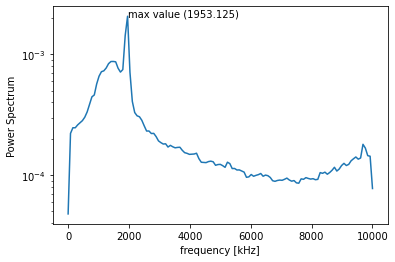


Velocity:  13.431314244
Max Frequency value:  2109.375


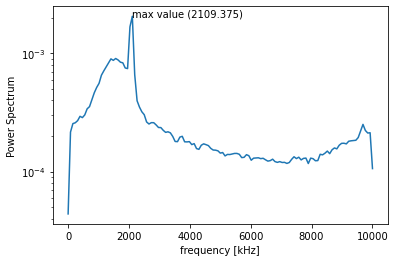


Velocity:  14.360647488
Max Frequency value:  2187.5


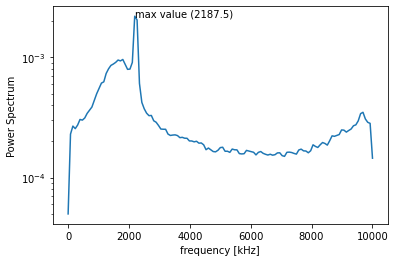

In [20]:
df6 = pd.read_csv(path_mat + dstream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

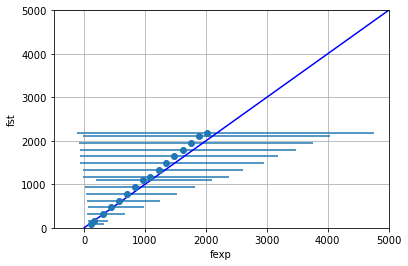

In [21]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.995701308
Max Frequency value:  78.125


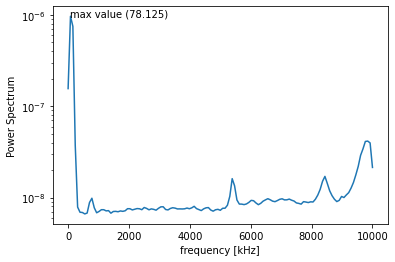


Velocity:  1.387142348
Max Frequency value:  156.25


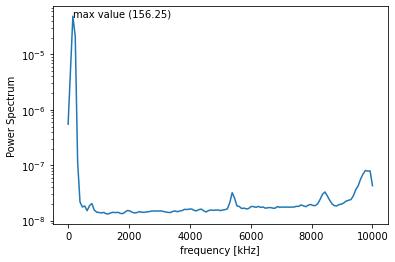


Velocity:  2.330963548
Max Frequency value:  312.5


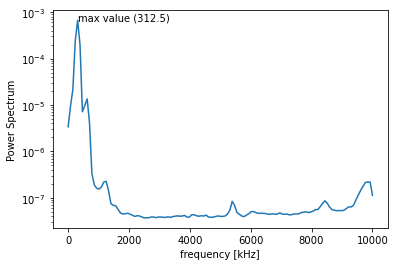


Velocity:  3.3268452040000005
Max Frequency value:  468.75


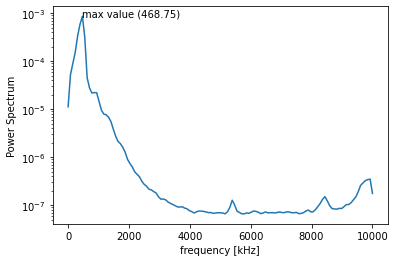


Velocity:  4.131918676
Max Frequency value:  625.0


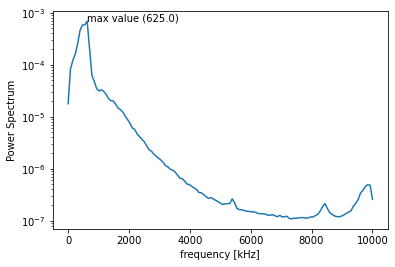


Velocity:  5.047133248
Max Frequency value:  781.25


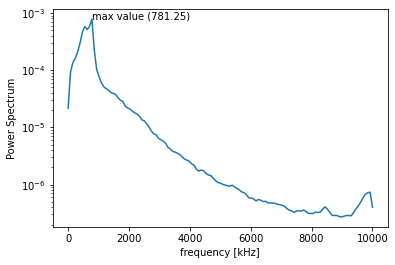


Velocity:  6.025795964
Max Frequency value:  937.5


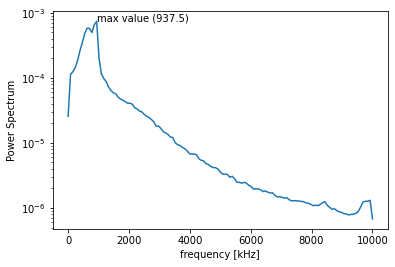


Velocity:  6.93124598
Max Frequency value:  1015.625


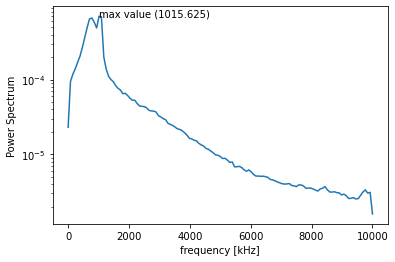


Velocity:  7.818747076
Max Frequency value:  1171.875


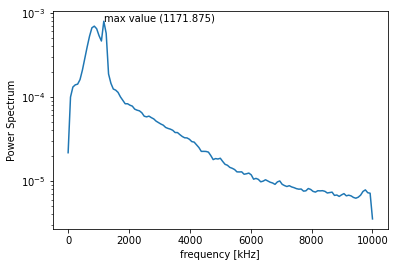


Velocity:  8.801695204
Max Frequency value:  1328.125


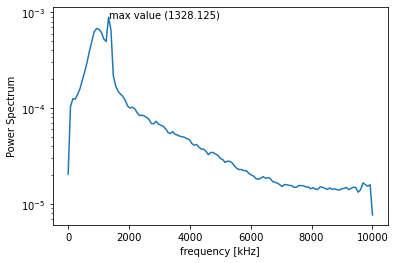


Velocity:  9.661190831999999
Max Frequency value:  1484.375


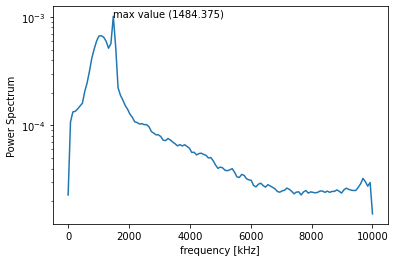


Velocity:  10.622119328
Max Frequency value:  1640.625


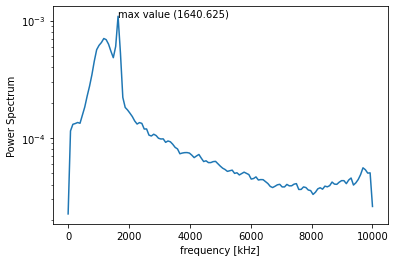


Velocity:  11.460754704
Max Frequency value:  1796.875


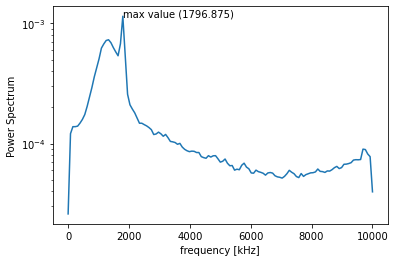


Velocity:  12.43696984
Max Frequency value:  1953.125


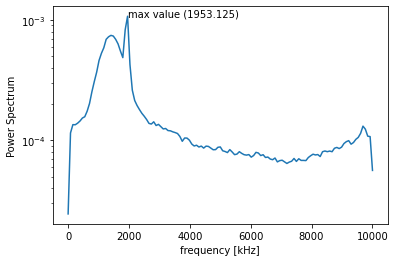


Velocity:  13.395897332
Max Frequency value:  2109.375


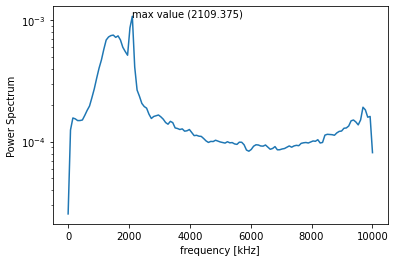


Velocity:  14.280031932
Max Frequency value:  2187.5


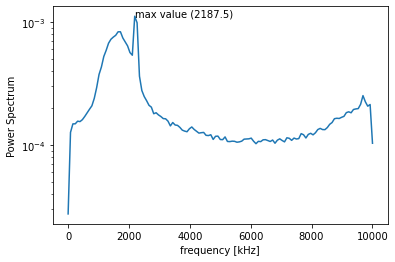

In [22]:
df7 = pd.read_csv(path_mat + dstream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

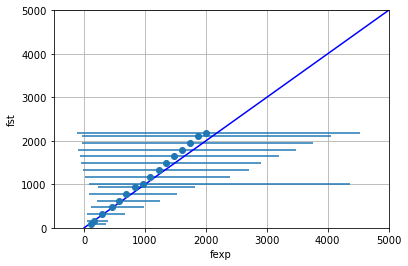

In [23]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  1.0105929
Max Frequency value:  78.125


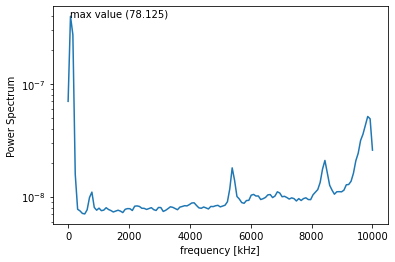


Velocity:  1.412279424
Max Frequency value:  156.25


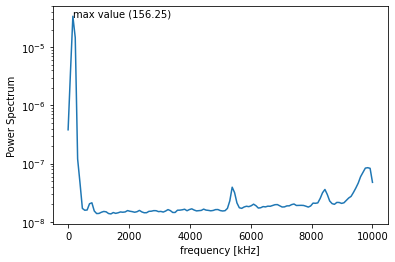


Velocity:  2.3156683200000003
Max Frequency value:  312.5


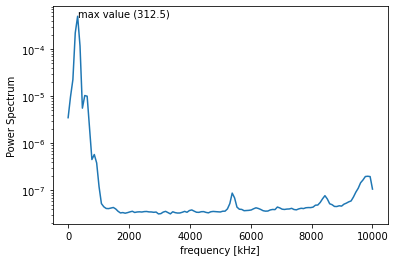


Velocity:  3.1975271000000003
Max Frequency value:  468.75


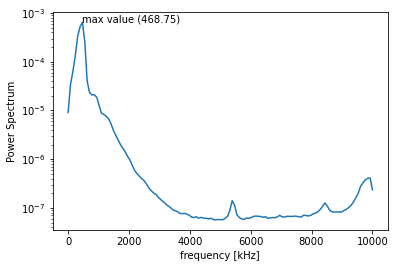


Velocity:  4.082374504000001
Max Frequency value:  468.75


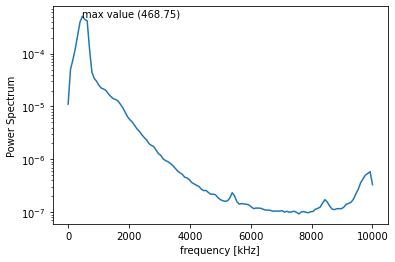


Velocity:  5.045630348
Max Frequency value:  546.875


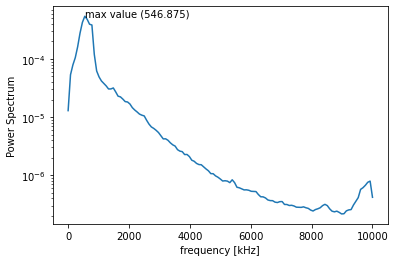


Velocity:  6.000856411999999
Max Frequency value:  703.125


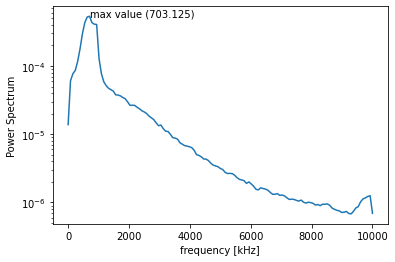


Velocity:  6.959105451999999
Max Frequency value:  781.25


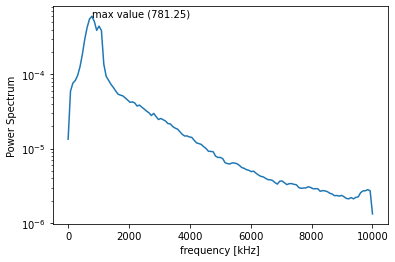


Velocity:  7.8226546159999995
Max Frequency value:  859.375


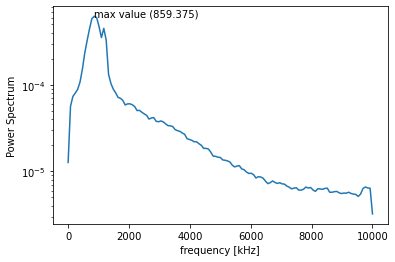


Velocity:  8.768803164
Max Frequency value:  937.5


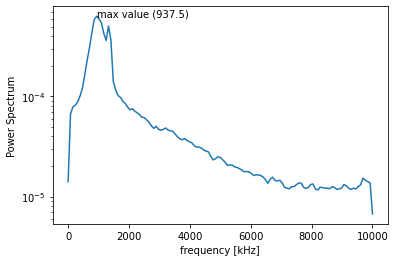


Velocity:  9.71693554
Max Frequency value:  1093.75


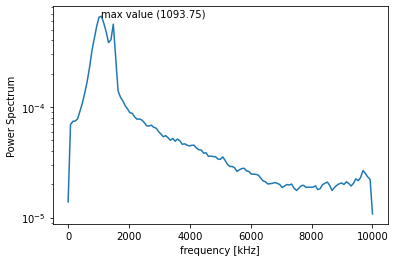


Velocity:  10.662663276
Max Frequency value:  1171.875


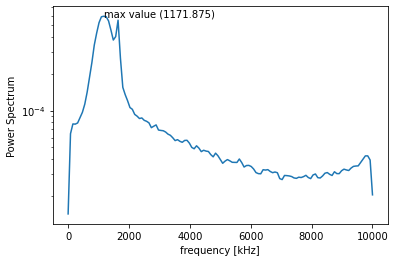


Velocity:  11.562659911999999
Max Frequency value:  1250.0


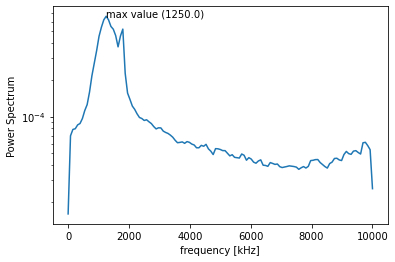


Velocity:  12.447498728000001
Max Frequency value:  1406.25


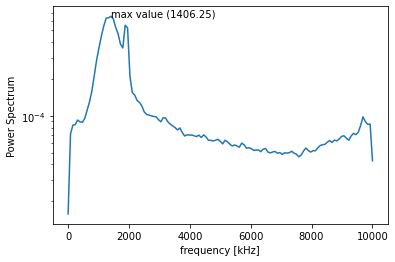


Velocity:  13.419368336000002
Max Frequency value:  1484.375


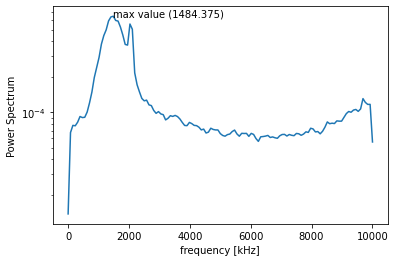


Velocity:  14.281114019999999
Max Frequency value:  1562.5


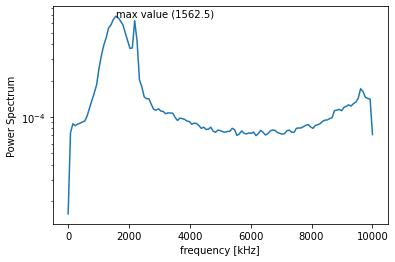

In [24]:
df8 = pd.read_csv(path_mat + dstream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

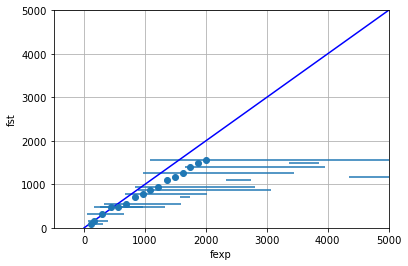

In [25]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.998767224
Max Frequency value:  78.125


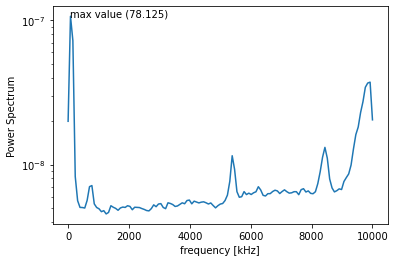


Velocity:  1.3404236280000001
Max Frequency value:  156.25


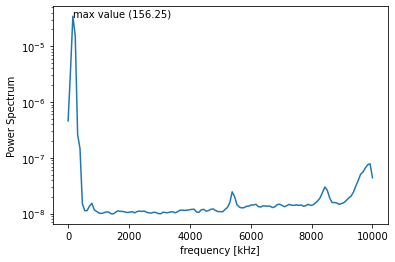


Velocity:  2.3426861679999997
Max Frequency value:  312.5


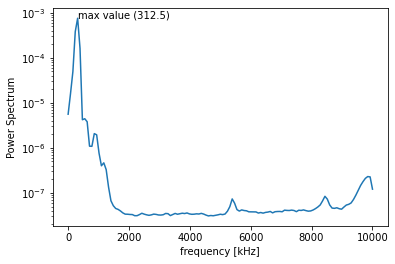


Velocity:  3.297482832
Max Frequency value:  390.625


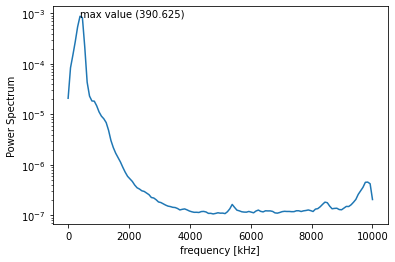


Velocity:  4.165806924
Max Frequency value:  468.75


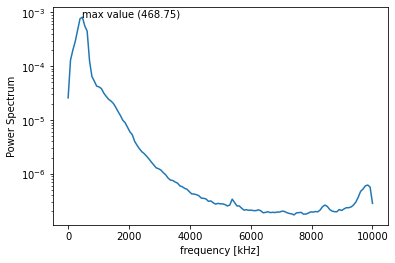


Velocity:  5.022313928
Max Frequency value:  546.875


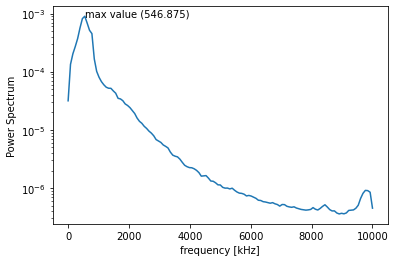


Velocity:  5.99627042
Max Frequency value:  625.0


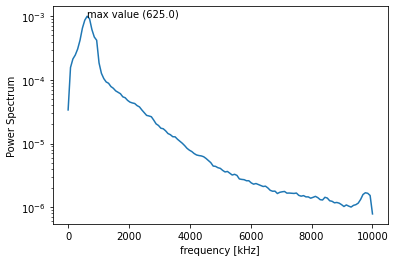


Velocity:  6.991636795999999
Max Frequency value:  703.125


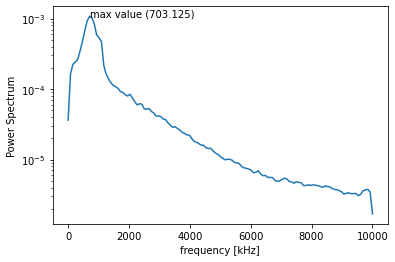


Velocity:  7.848092272
Max Frequency value:  859.375


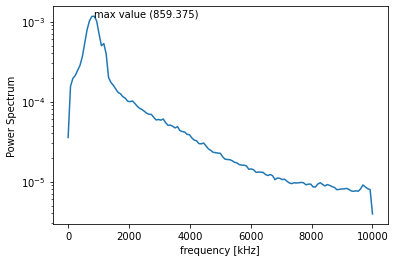


Velocity:  8.776858708
Max Frequency value:  937.5


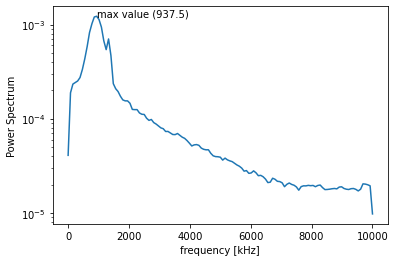


Velocity:  9.726639980000002
Max Frequency value:  1015.625


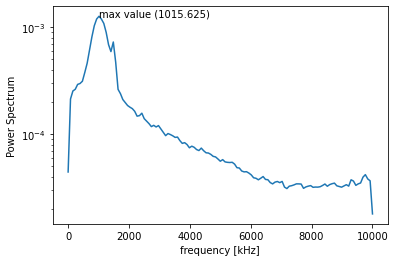


Velocity:  10.668975456
Max Frequency value:  1093.75


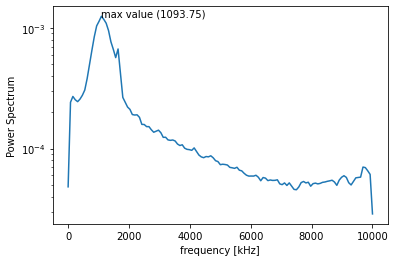


Velocity:  11.517487032
Max Frequency value:  1171.875


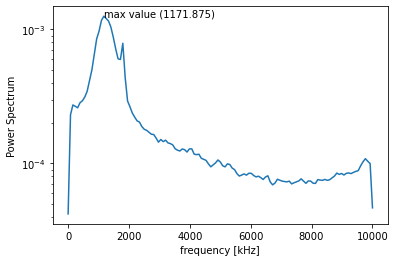


Velocity:  12.422782463999999
Max Frequency value:  1250.0


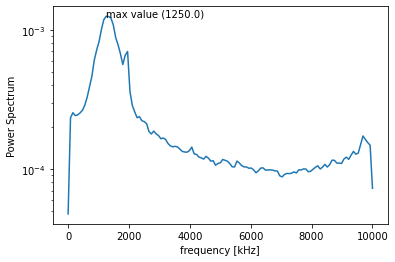


Velocity:  13.459792052
Max Frequency value:  1328.125


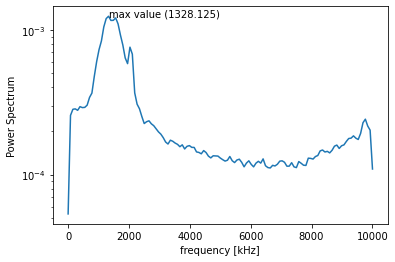


Velocity:  14.348615700000002
Max Frequency value:  1562.5


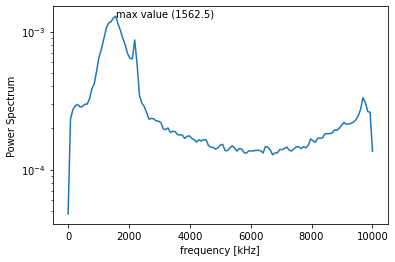

In [26]:
df9 = pd.read_csv(path_mat + dstream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

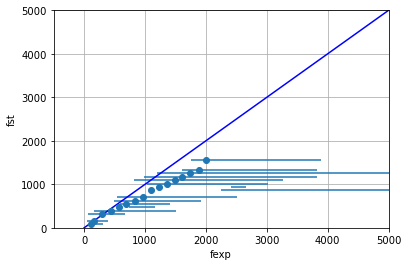

In [27]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

Velocity:  0.984176212
Max Frequency value:  78.125


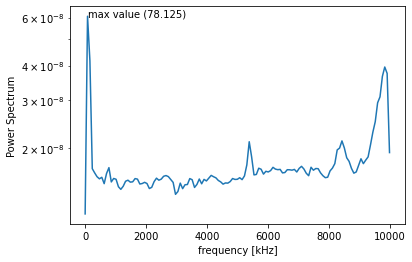


Velocity:  1.388284552
Max Frequency value:  156.25


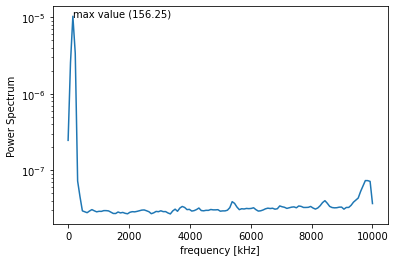


Velocity:  2.367634308
Max Frequency value:  312.5


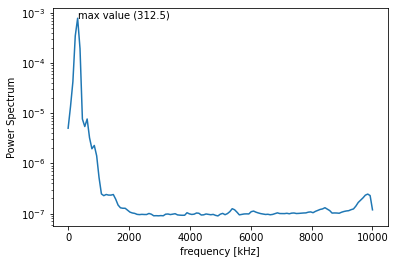


Velocity:  3.314658832
Max Frequency value:  390.625


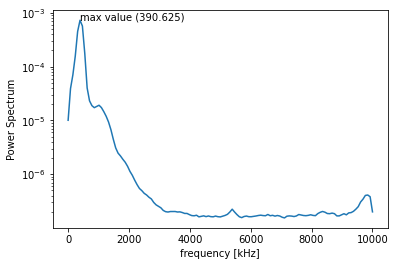


Velocity:  4.114416332
Max Frequency value:  468.75


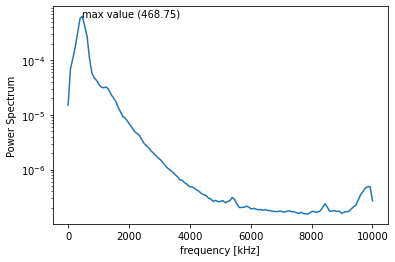


Velocity:  5.098687012
Max Frequency value:  546.875


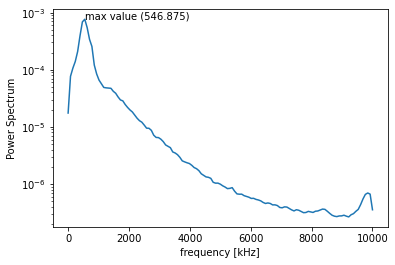


Velocity:  5.984144164000001
Max Frequency value:  625.0


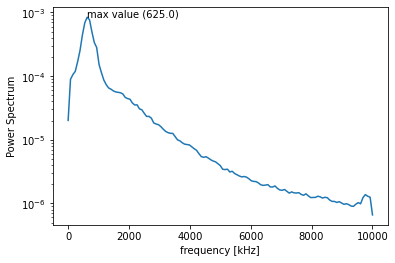


Velocity:  6.994874472
Max Frequency value:  703.125


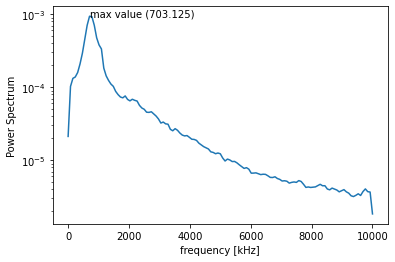


Velocity:  7.859832068
Max Frequency value:  859.375


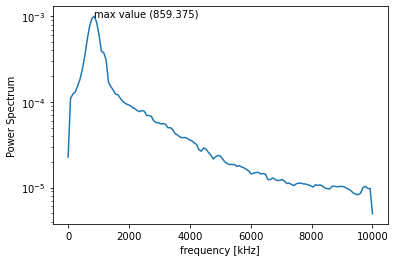


Velocity:  8.782191856
Max Frequency value:  937.5


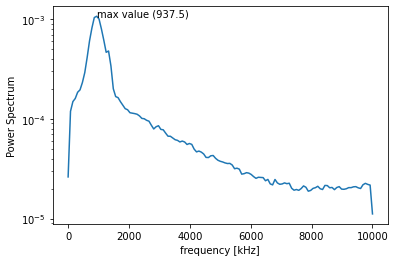


Velocity:  9.738757648000002
Max Frequency value:  1015.625


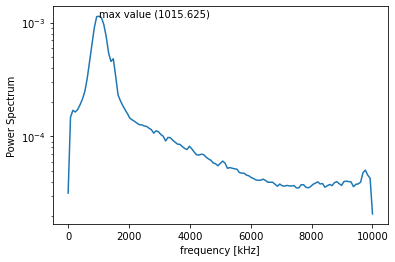


Velocity:  10.598081516
Max Frequency value:  1171.875


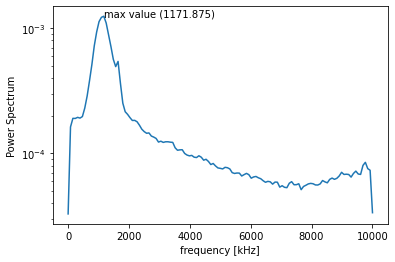


Velocity:  11.53849328
Max Frequency value:  1171.875


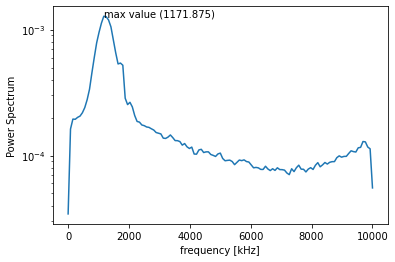


Velocity:  12.447584608000001
Max Frequency value:  1406.25


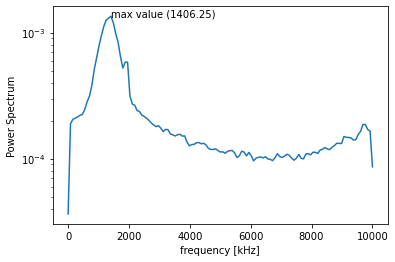


Velocity:  13.461372244
Max Frequency value:  1406.25


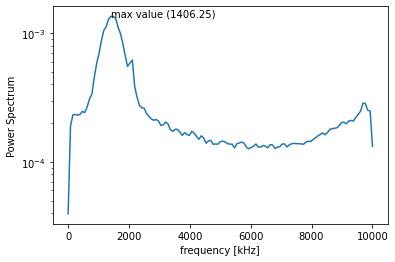


Velocity:  14.283767712
Max Frequency value:  1484.375


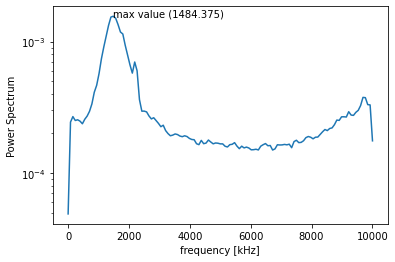

In [28]:
df10 = pd.read_csv(path_mat + dstream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

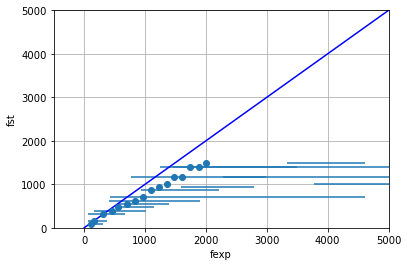

In [29]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

Velocity:  0.9355509560000002
Max Frequency value:  78.125


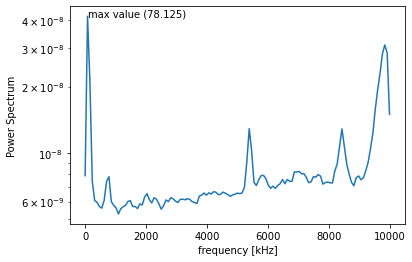


Velocity:  1.387022116
Max Frequency value:  156.25


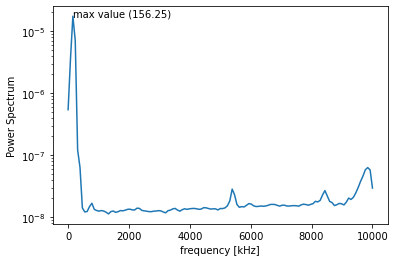


Velocity:  2.33091202
Max Frequency value:  312.5


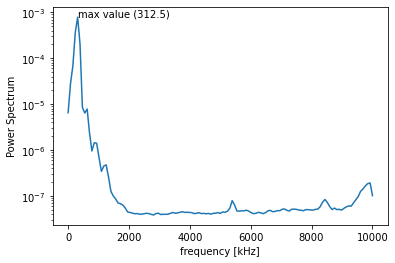


Velocity:  3.2825225359999997
Max Frequency value:  390.625


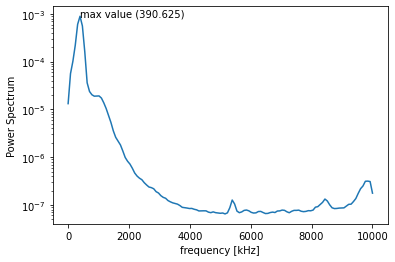


Velocity:  4.076268435999999
Max Frequency value:  468.75


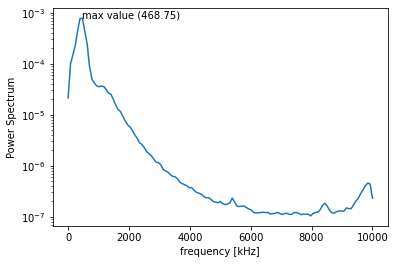


Velocity:  5.131621992
Max Frequency value:  546.875


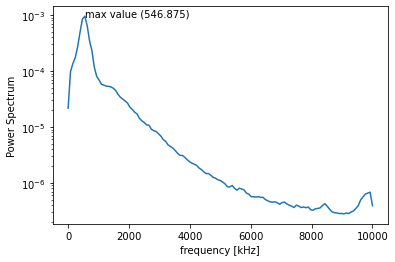


Velocity:  5.975058059999999
Max Frequency value:  625.0


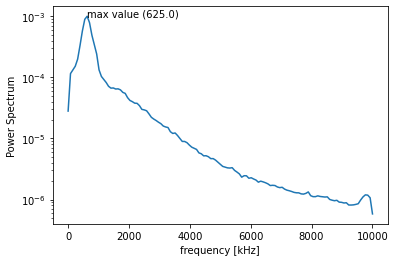


Velocity:  6.926213412
Max Frequency value:  703.125


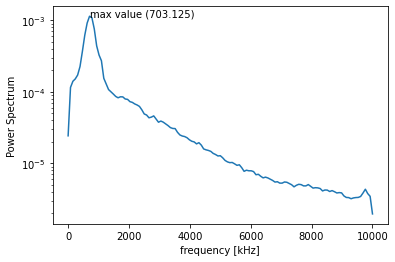


Velocity:  7.86519098
Max Frequency value:  781.25


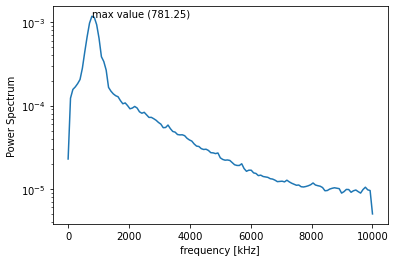


Velocity:  8.79385436
Max Frequency value:  937.5


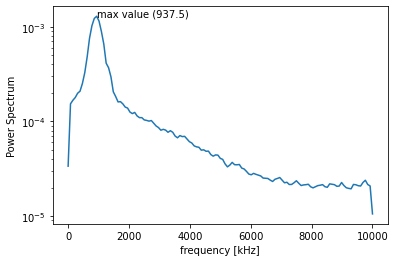


Velocity:  9.748298916
Max Frequency value:  1015.625


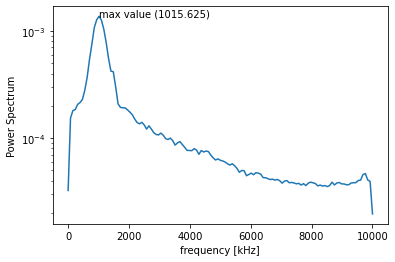


Velocity:  10.657227072
Max Frequency value:  1093.75


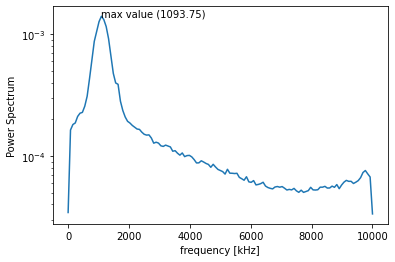


Velocity:  11.512952568000001
Max Frequency value:  1171.875


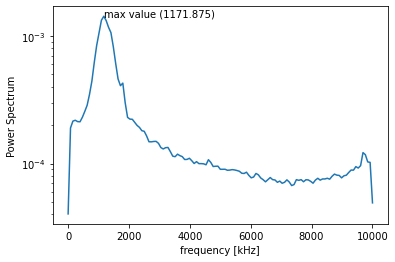


Velocity:  12.48832608
Max Frequency value:  1250.0


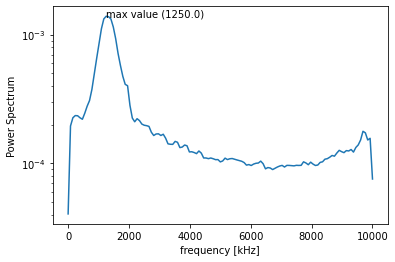


Velocity:  13.418166016
Max Frequency value:  1328.125


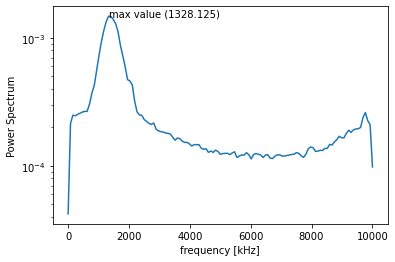


Velocity:  14.269872328000002
Max Frequency value:  1406.25


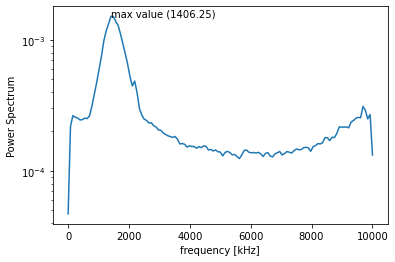

In [30]:
df11 = pd.read_csv(path_mat + dstream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

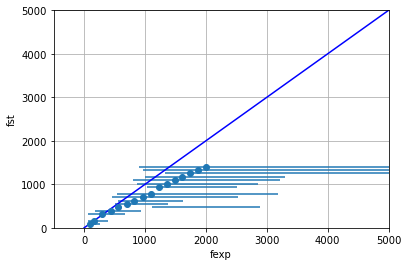

In [31]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

Velocity:  0.9739650800000001
Max Frequency value:  9921.875


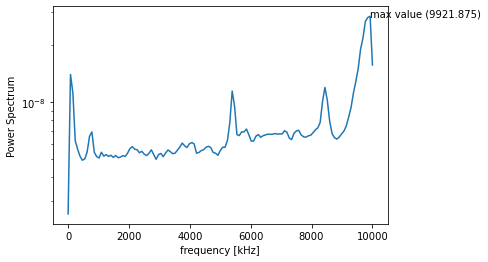


Velocity:  1.335743168
Max Frequency value:  156.25


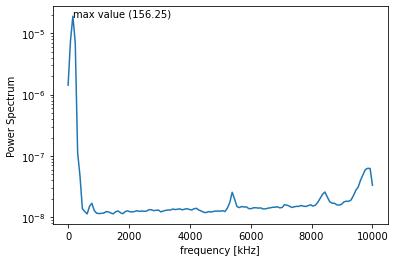


Velocity:  2.2856962000000003
Max Frequency value:  312.5


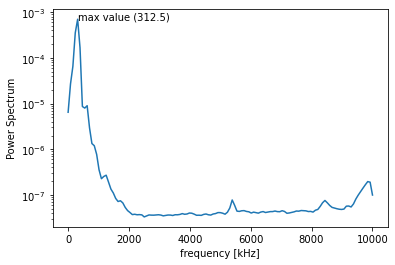


Velocity:  3.2561659640000005
Max Frequency value:  390.625


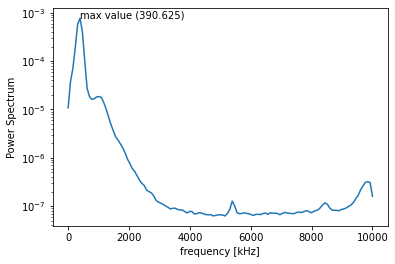


Velocity:  4.144474332000001
Max Frequency value:  468.75


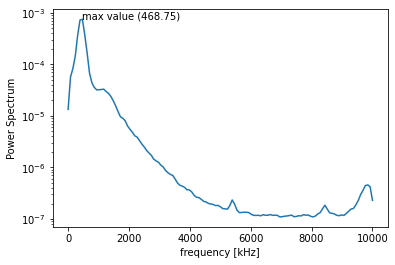


Velocity:  5.006512008
Max Frequency value:  546.875


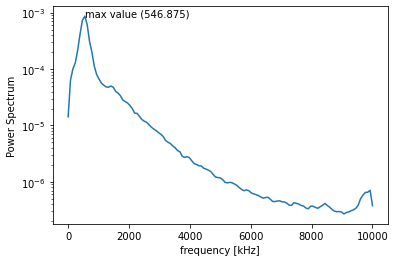


Velocity:  6.018118292
Max Frequency value:  625.0


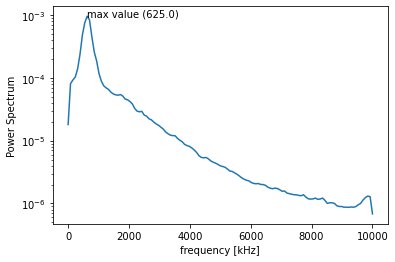


Velocity:  7.003977752
Max Frequency value:  703.125


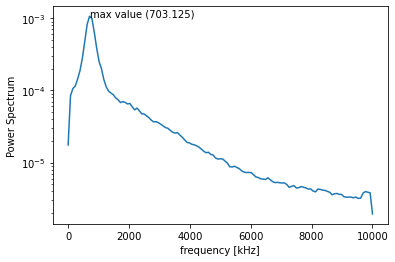


Velocity:  7.847877572
Max Frequency value:  859.375


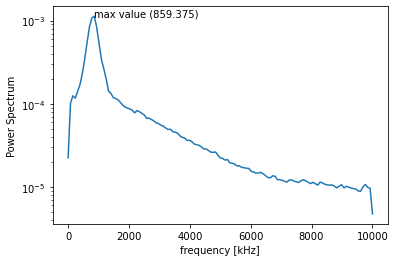


Velocity:  8.785747288000001
Max Frequency value:  937.5


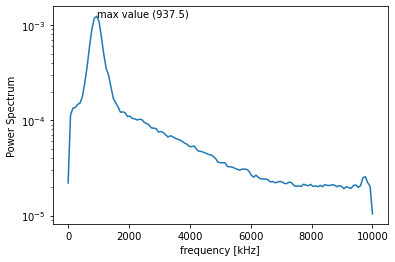


Velocity:  9.735167864
Max Frequency value:  1015.625


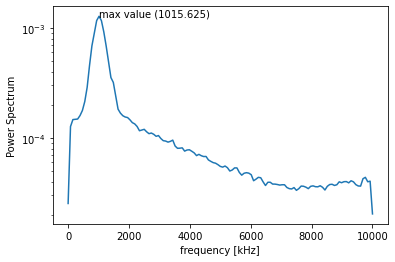


Velocity:  10.681797340000001
Max Frequency value:  1093.75


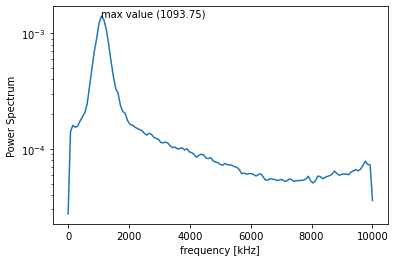


Velocity:  11.528453908000001
Max Frequency value:  1250.0


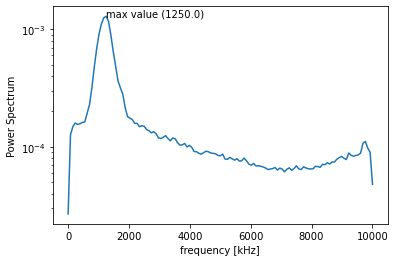


Velocity:  12.4498089
Max Frequency value:  1328.125


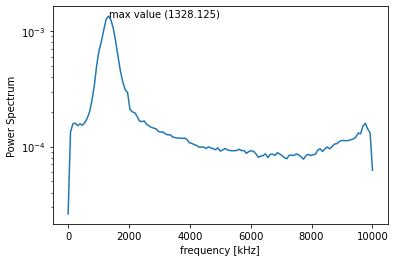


Velocity:  13.36322858
Max Frequency value:  1406.25


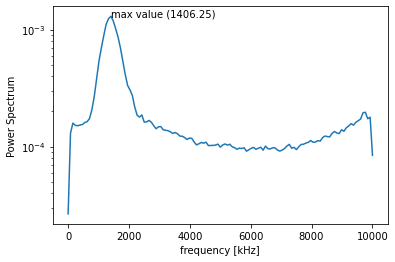


Velocity:  14.315079560000001
Max Frequency value:  1484.375


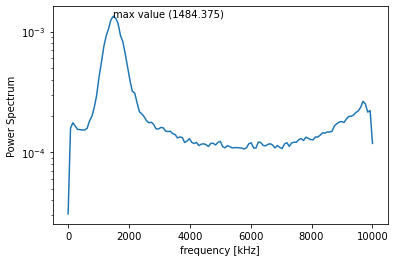

In [32]:
df12 = pd.read_csv(path_mat + dstream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

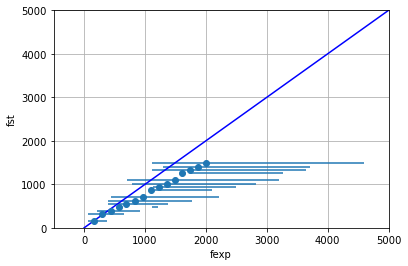

In [33]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

# Upstream

#### Velocidades UpStream

In [34]:
velocity = pd.read_csv(path_mat + ustream[0])
velocity.head()

PVDF peak  mA  PVDF peak V  PVDF peak power  n/a  Solar mA 1  Solar V 1  \
0        0.00007          0.0              0.0  0.0         inf    0.00108   
1        0.00007          0.0              0.0  0.0         inf    0.00111   
2        0.00007          0.0              0.0  0.0         inf    0.00110   
3        0.00007          0.0              0.0  0.0         inf    0.00110   
4        0.00007          0.0              0.0  0.0         inf    0.00110   

   solar mW 1  tunnel P  tunnel V      Patm  Tatm  num of 470k  Solar mA 2  \
0         inf   0.67876   1.06030  101592.0  20.0          0.0         inf   
1         inf   1.64293   1.64961  101592.0  20.0          0.0         inf   
2         inf   4.52088   2.73642  101592.0  20.0          0.0         inf   
3         inf   8.87264   3.83352  101592.0  20.0          0.0         inf   
4         inf  13.83619   4.78718  101592.0  20.0          0.0         inf   

   Solar V 2  Solar mW 2  
0    0.00111         inf  
1    0.00112         inf  
2    0.00113         inf  
3    0.00113         inf  
4    0.00113         inf

In [35]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

tunnel V
count  207.000000
mean     7.449860
std      4.223327
min      0.887724
25%      4.077741
50%      7.771788
75%     11.081071
max     14.457323

In [36]:
df_prueba = pd.read_csv(path_mat + ustream[1])
df_prueba.describe()

0.64348
count  1.599999e+06
mean   7.687762e+00
std    4.593580e+00
min    5.415600e-01
25%    3.693270e+00
50%    7.642470e+00
75%    1.148695e+01
max    2.295242e+01

## Graficas Upstream

## y-2

Velocity:  0.91058564
Max Frequency value:  78.125


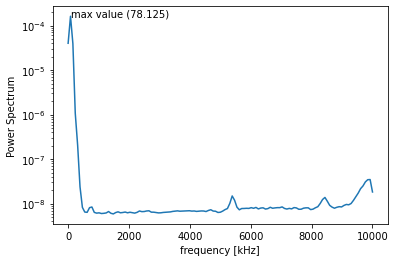


Velocity:  1.4166850679999998
Max Frequency value:  78.125


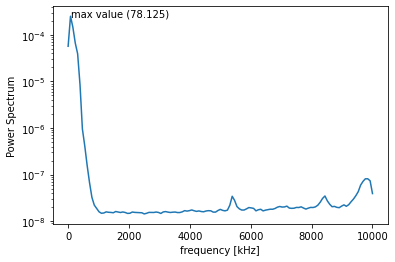


Velocity:  2.350037496
Max Frequency value:  234.375


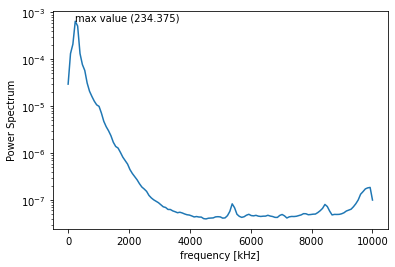


Velocity:  3.292226976
Max Frequency value:  468.75


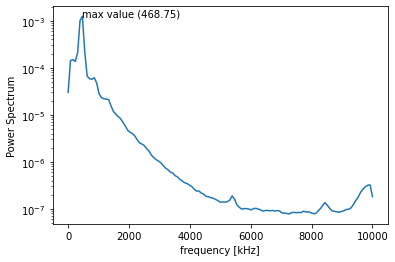


Velocity:  4.111230184
Max Frequency value:  546.875


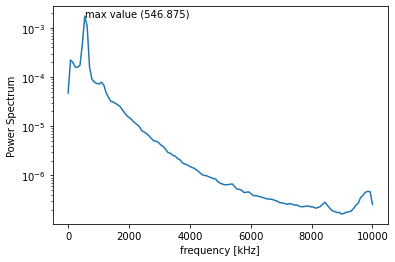


Velocity:  5.128075148
Max Frequency value:  703.125


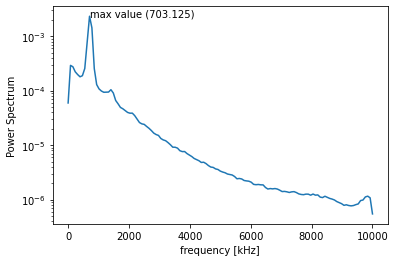


Velocity:  6.022772988000001
Max Frequency value:  859.375


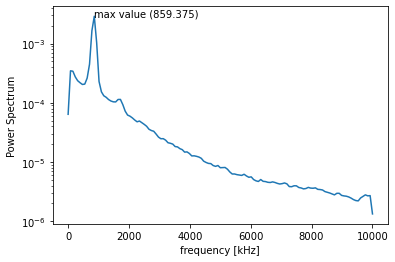


Velocity:  6.935763268
Max Frequency value:  937.5


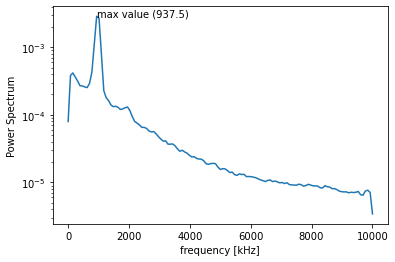


Velocity:  7.804199004
Max Frequency value:  1093.75


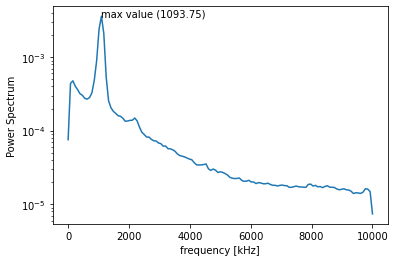


Velocity:  8.757089131999999
Max Frequency value:  1171.875


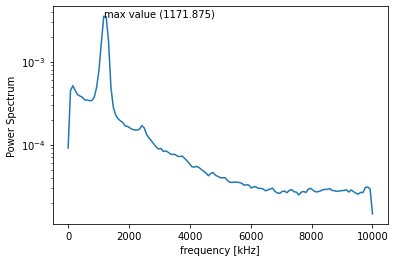


Velocity:  9.681844972
Max Frequency value:  1328.125


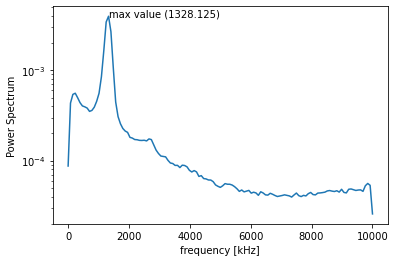


Velocity:  10.660937088
Max Frequency value:  1406.25


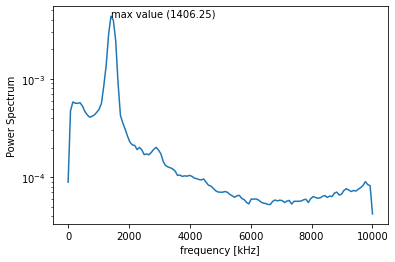


Velocity:  11.517040456000002
Max Frequency value:  1562.5


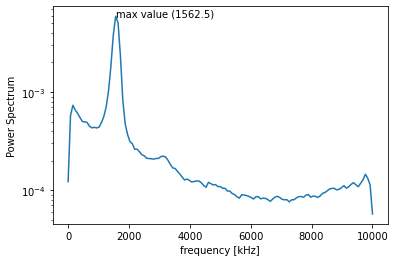


Velocity:  12.52899026
Max Frequency value:  1718.75


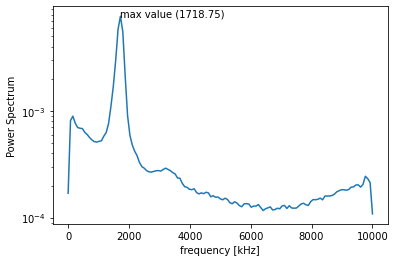


Velocity:  13.359741851999999
Max Frequency value:  1796.875


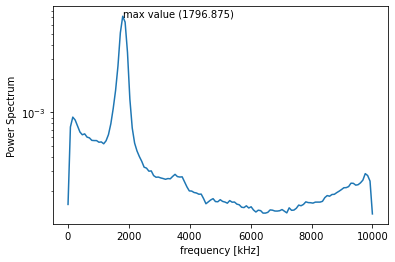


Velocity:  14.397979523999998
Max Frequency value:  1953.125


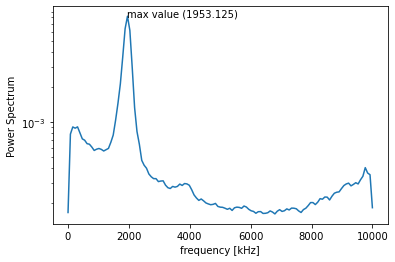

In [37]:
df = pd.read_csv(path_mat + ustream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

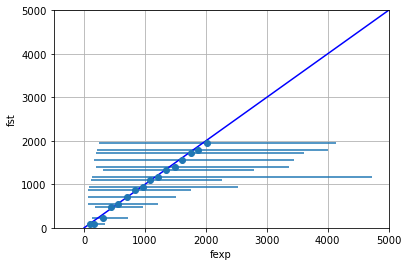

In [38]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.9708819880000001
Max Frequency value:  78.125


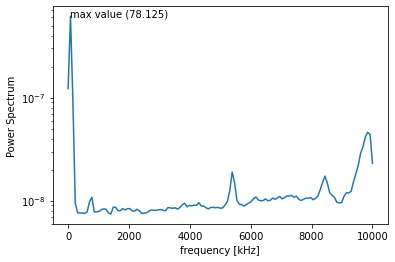


Velocity:  1.393119596
Max Frequency value:  78.125


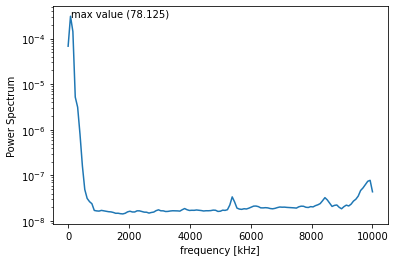


Velocity:  2.33280138
Max Frequency value:  234.375


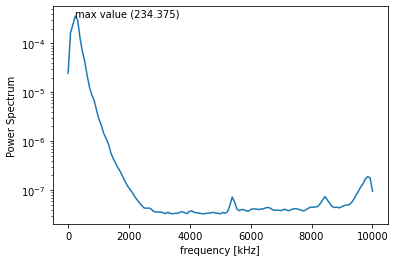


Velocity:  3.293343416
Max Frequency value:  546.875


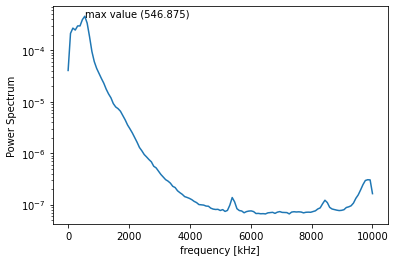


Velocity:  4.074937296
Max Frequency value:  390.625


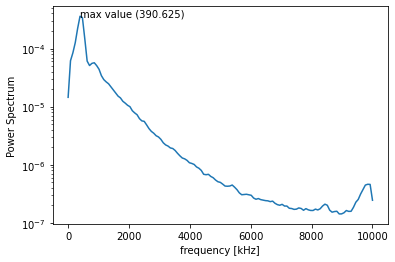


Velocity:  5.12269906
Max Frequency value:  546.875


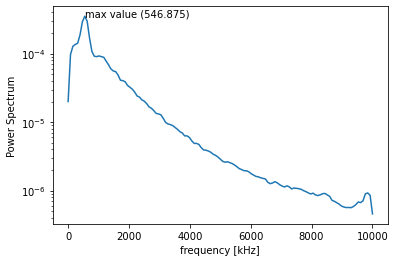


Velocity:  6.044775444000001
Max Frequency value:  625.0


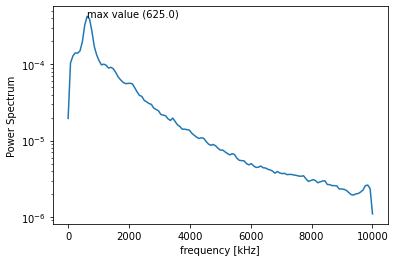


Velocity:  6.9432434160000005
Max Frequency value:  703.125


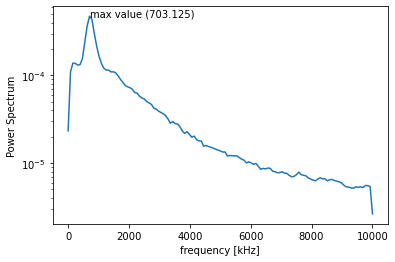


Velocity:  7.864649935999999
Max Frequency value:  859.375


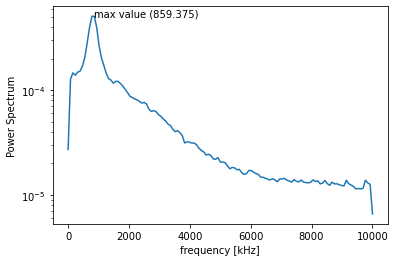


Velocity:  8.725425176
Max Frequency value:  937.5


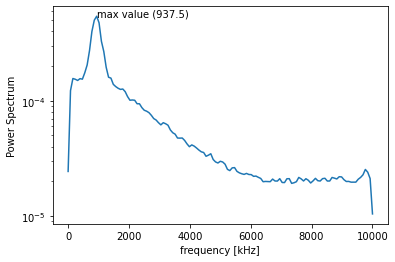


Velocity:  9.704242476000001
Max Frequency value:  1015.625


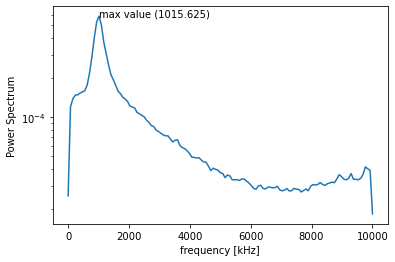


Velocity:  10.720589336
Max Frequency value:  1171.875


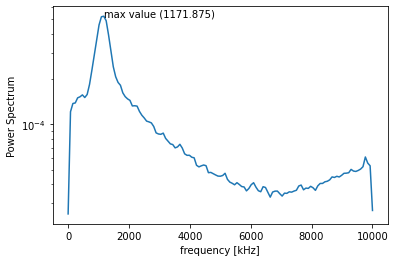


Velocity:  11.573429264
Max Frequency value:  1250.0


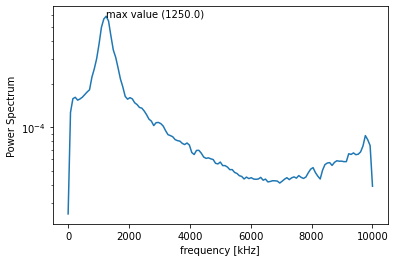


Velocity:  12.442010996
Max Frequency value:  1250.0


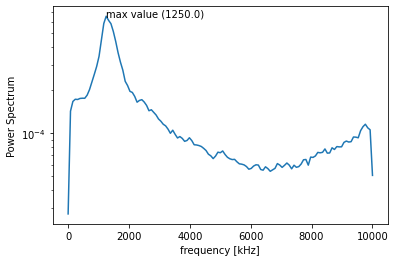


Velocity:  13.432894436000002
Max Frequency value:  1406.25


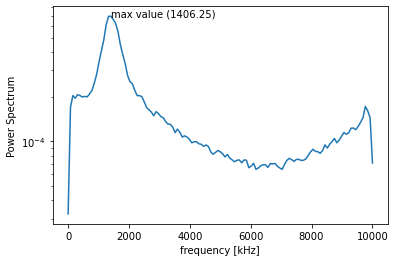


Velocity:  14.40645588
Max Frequency value:  1562.5


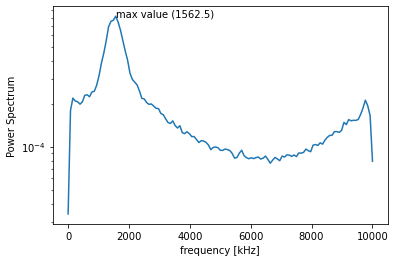

In [39]:
df1 = pd.read_csv(path_mat + ustream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

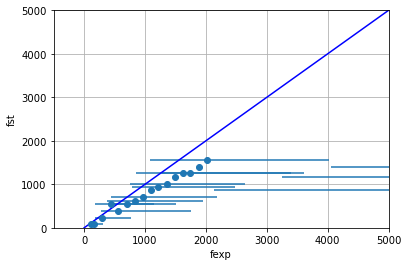

In [40]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.965600368
Max Frequency value:  9843.75


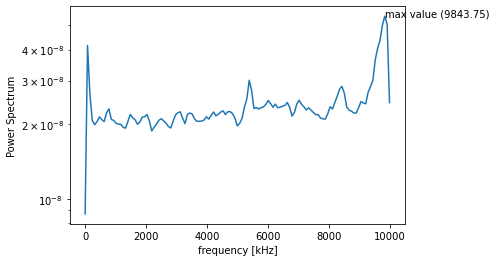


Velocity:  1.3455249
Max Frequency value:  78.125


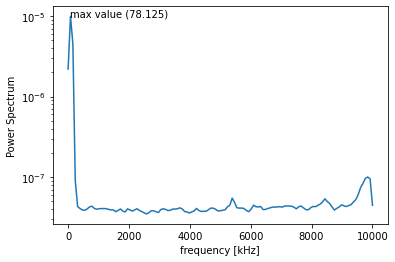


Velocity:  2.298518084
Max Frequency value:  156.25


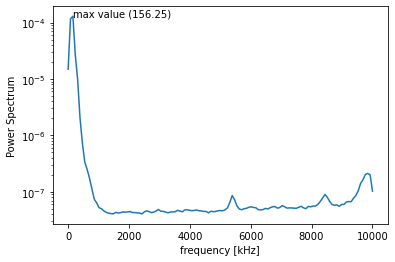


Velocity:  3.310579532
Max Frequency value:  312.5


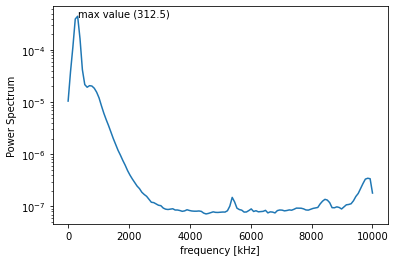


Velocity:  4.080562435999999
Max Frequency value:  390.625


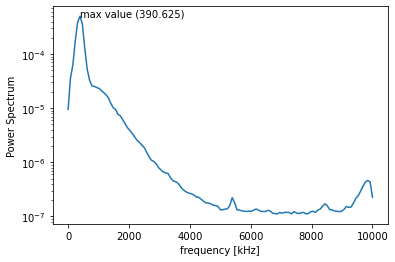


Velocity:  5.101641284
Max Frequency value:  468.75


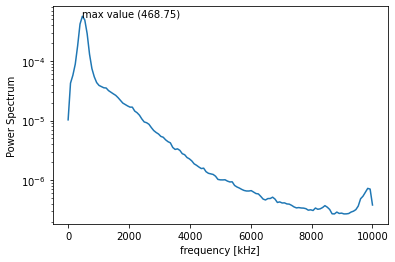


Velocity:  6.013214544
Max Frequency value:  546.875


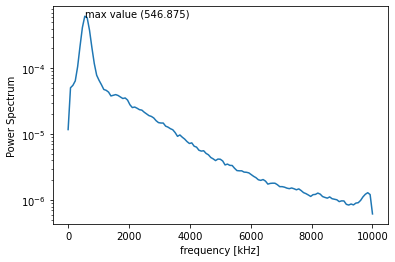


Velocity:  6.937798624000001
Max Frequency value:  703.125


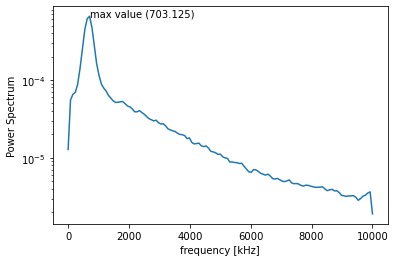


Velocity:  7.86098286
Max Frequency value:  781.25


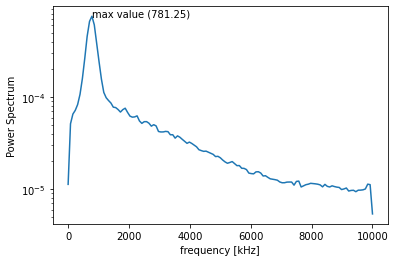


Velocity:  8.70625676
Max Frequency value:  859.375


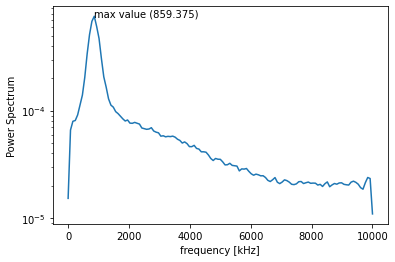


Velocity:  9.690235448
Max Frequency value:  937.5


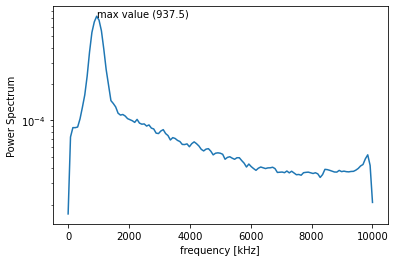


Velocity:  10.628457272
Max Frequency value:  1015.625


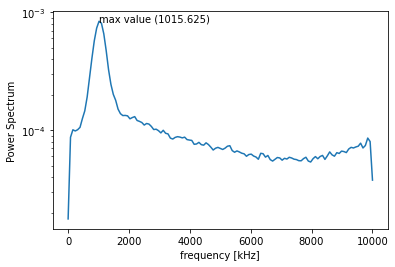


Velocity:  11.510565104
Max Frequency value:  1171.875


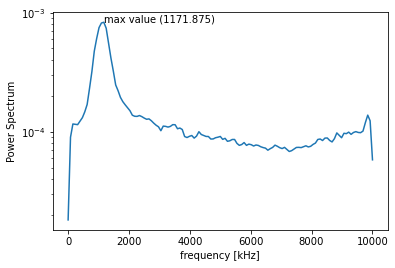


Velocity:  12.533430256000003
Max Frequency value:  1250.0


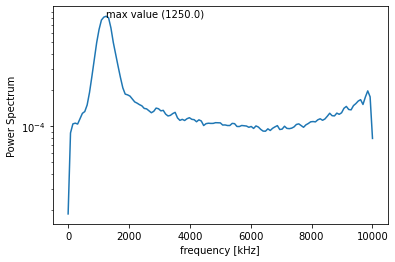


Velocity:  13.380215644
Max Frequency value:  1250.0


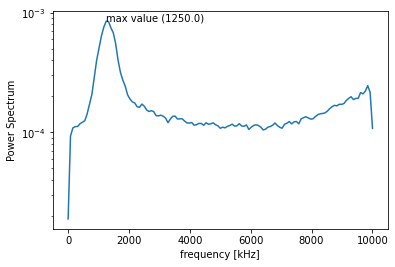


Velocity:  14.370704036000001
Max Frequency value:  1328.125


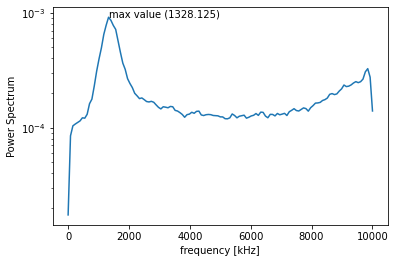

In [41]:
df2 = pd.read_csv(path_mat + ustream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

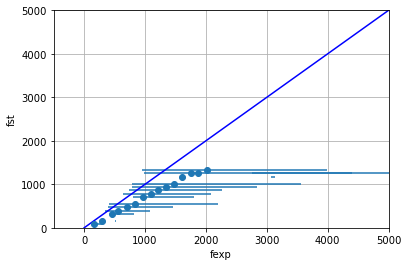

In [42]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.957673644
Max Frequency value:  9843.75


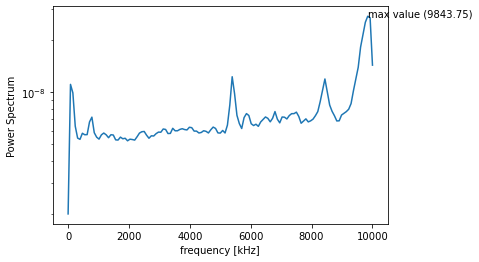


Velocity:  1.3371687760000002
Max Frequency value:  78.125


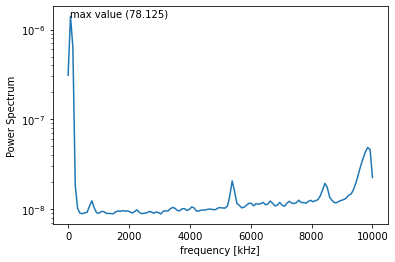


Velocity:  2.367307964
Max Frequency value:  156.25


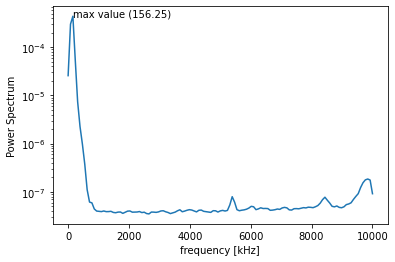


Velocity:  3.217700312
Max Frequency value:  234.375


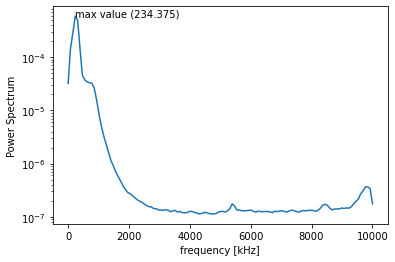


Velocity:  4.176275696
Max Frequency value:  390.625


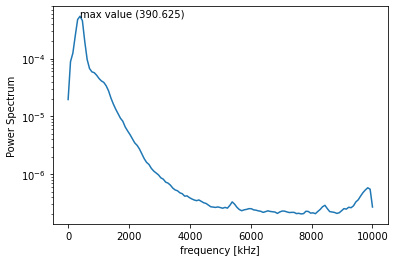


Velocity:  5.1302049720000005
Max Frequency value:  468.75


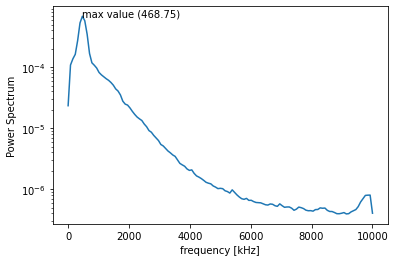


Velocity:  6.0340318559999995
Max Frequency value:  546.875


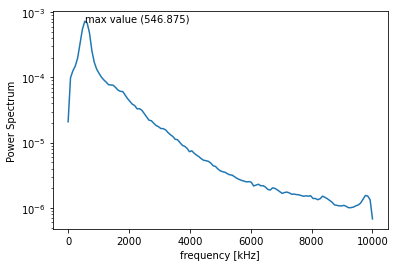


Velocity:  7.018431355999999
Max Frequency value:  703.125


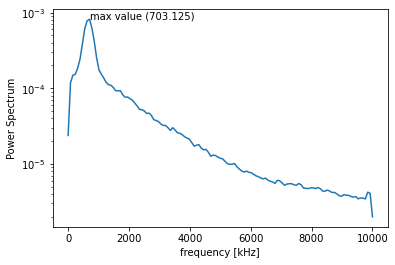


Velocity:  7.873590044
Max Frequency value:  781.25


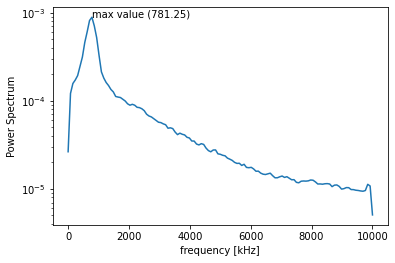


Velocity:  8.748750184
Max Frequency value:  859.375


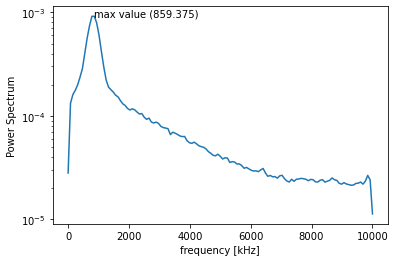


Velocity:  9.681939439999999
Max Frequency value:  937.5


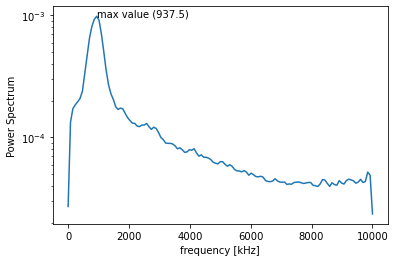


Velocity:  10.7193269
Max Frequency value:  1015.625


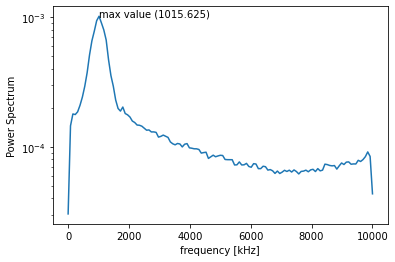


Velocity:  11.510745452
Max Frequency value:  1093.75


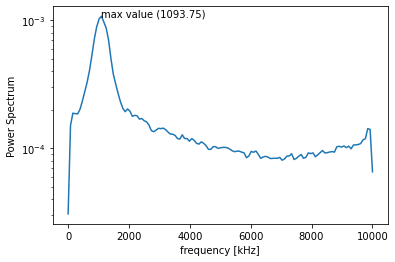


Velocity:  12.434101448
Max Frequency value:  1171.875


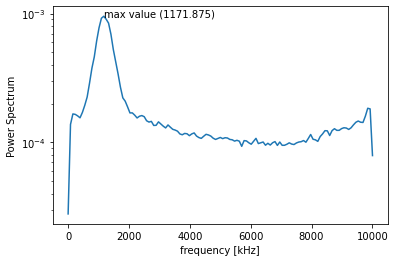


Velocity:  13.414644936000002
Max Frequency value:  1250.0


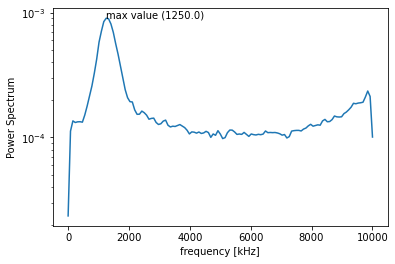


Velocity:  14.40727174
Max Frequency value:  1328.125


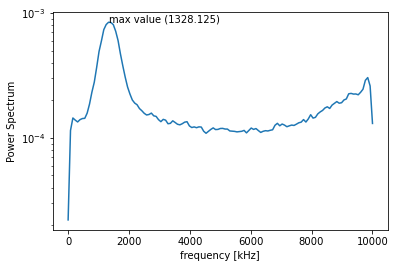

In [43]:
df3 = pd.read_csv(path_mat + ustream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

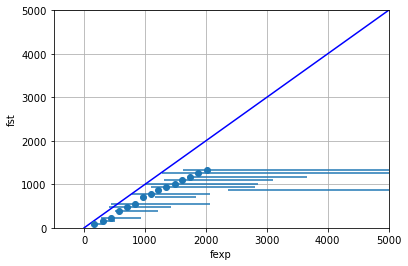

In [44]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.975347748
Max Frequency value:  9843.75


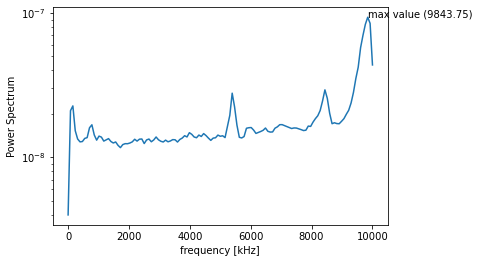


Velocity:  1.4029013280000002
Max Frequency value:  9765.625


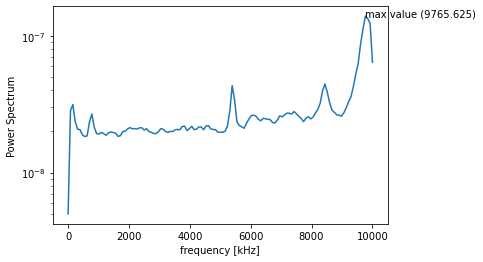


Velocity:  2.344412356
Max Frequency value:  9843.75


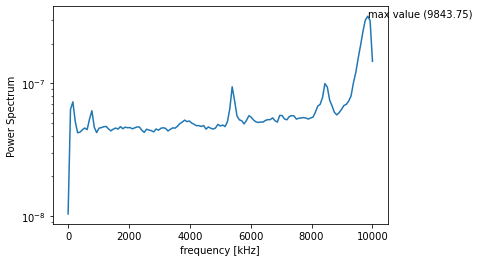


Velocity:  3.2656385279999998
Max Frequency value:  9843.75


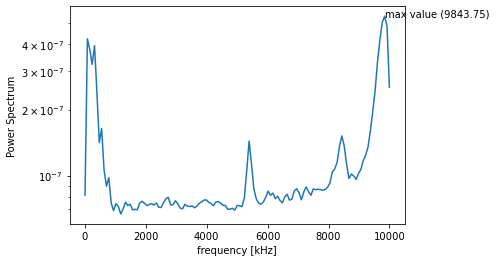


Velocity:  4.088463396
Max Frequency value:  312.5


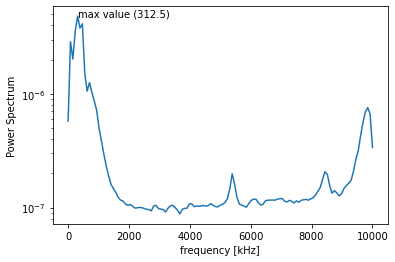


Velocity:  5.174544816
Max Frequency value:  390.625


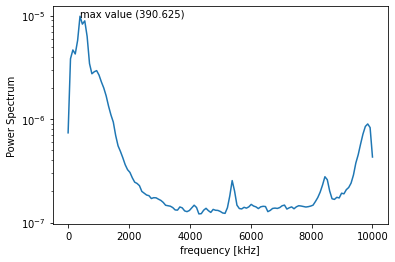


Velocity:  6.032425900000001
Max Frequency value:  703.125


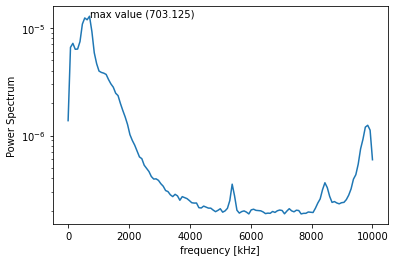


Velocity:  6.935213635999999
Max Frequency value:  781.25


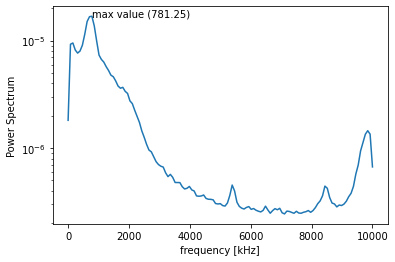


Velocity:  7.824990552
Max Frequency value:  859.375


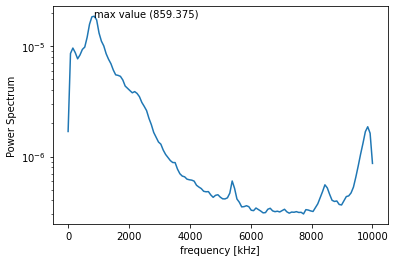


Velocity:  8.780431316
Max Frequency value:  937.5


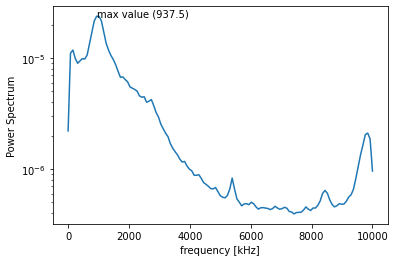


Velocity:  9.725935764
Max Frequency value:  1093.75


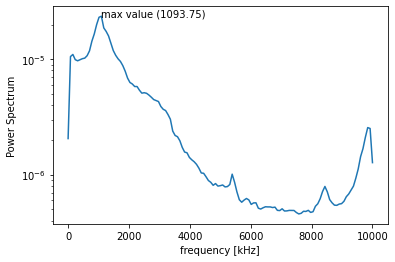


Velocity:  10.636684576
Max Frequency value:  1093.75


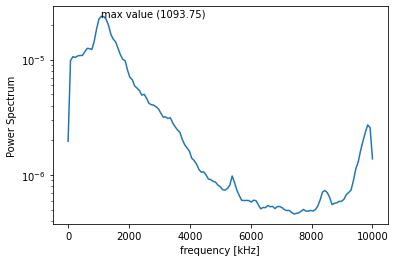


Velocity:  11.497820512
Max Frequency value:  1250.0


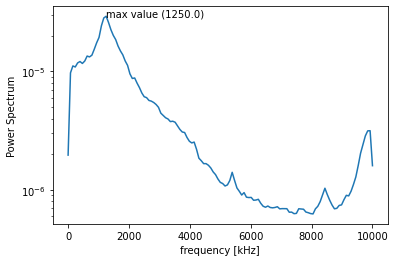


Velocity:  12.461239528000002
Max Frequency value:  1406.25


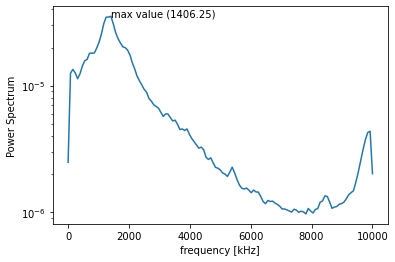


Velocity:  13.37362006
Max Frequency value:  1328.125


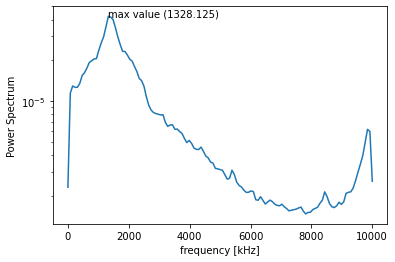


Velocity:  14.315345788
Max Frequency value:  1484.375


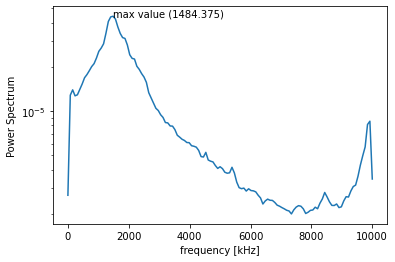

In [45]:
df4 = pd.read_csv(path_mat + ustream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

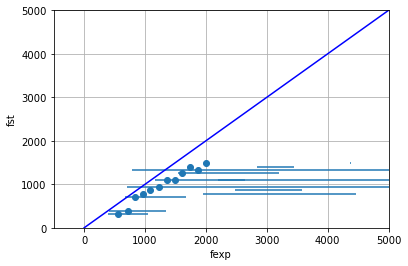

In [46]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.9531305919999999
Max Frequency value:  9765.625


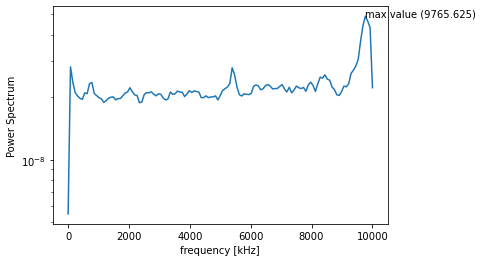


Velocity:  1.3805982920000002
Max Frequency value:  78.125


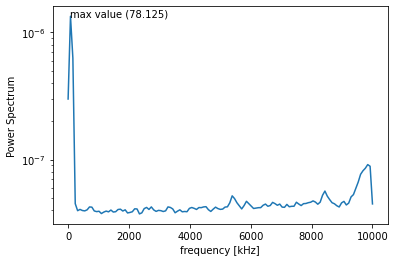


Velocity:  2.274643444
Max Frequency value:  156.25


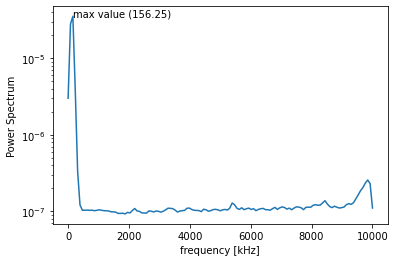


Velocity:  3.286146672
Max Frequency value:  234.375


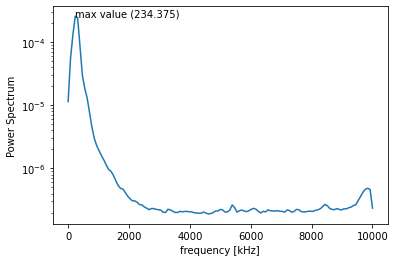


Velocity:  4.1378873359999995
Max Frequency value:  390.625


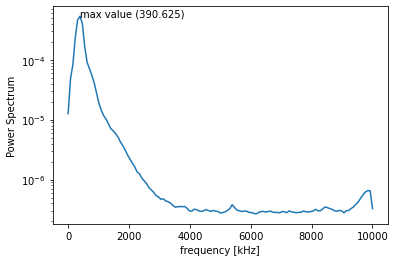


Velocity:  5.060719464
Max Frequency value:  468.75


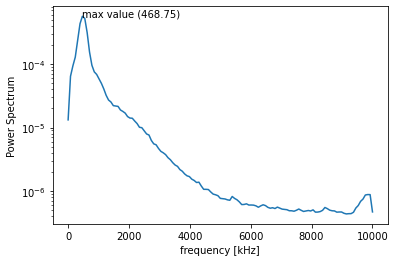


Velocity:  5.974568544
Max Frequency value:  546.875


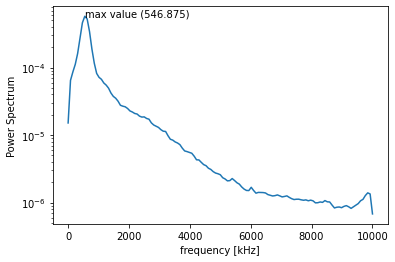


Velocity:  6.9434924680000005
Max Frequency value:  625.0


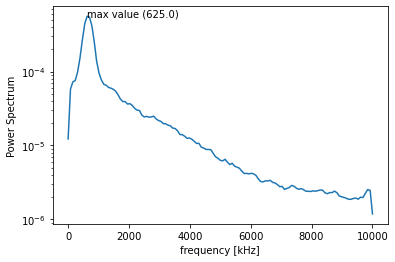


Velocity:  7.802266704
Max Frequency value:  781.25


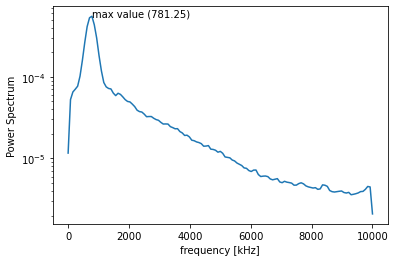


Velocity:  8.814963664
Max Frequency value:  859.375


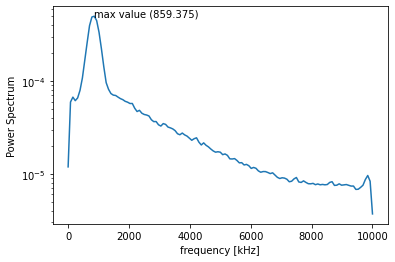


Velocity:  9.737916024
Max Frequency value:  937.5


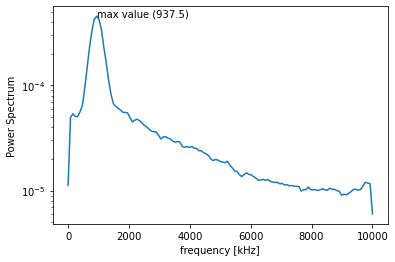


Velocity:  10.687954935999999
Max Frequency value:  1015.625


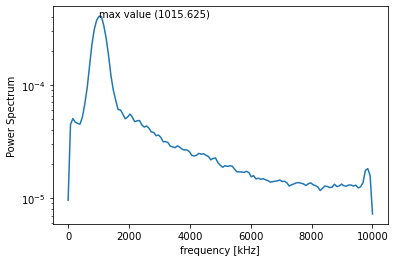


Velocity:  11.467367463999999
Max Frequency value:  1093.75


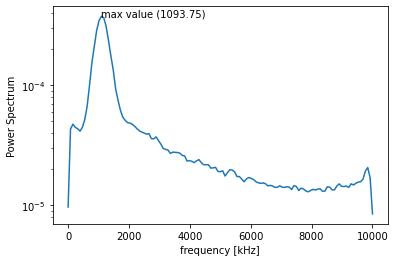


Velocity:  12.542482008
Max Frequency value:  1250.0


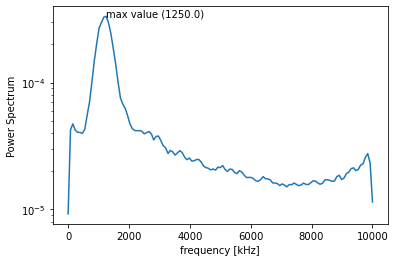


Velocity:  13.432027048
Max Frequency value:  1328.125


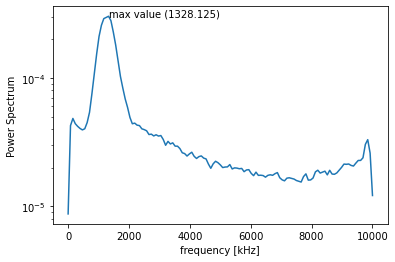


Velocity:  14.339546771999998
Max Frequency value:  1484.375


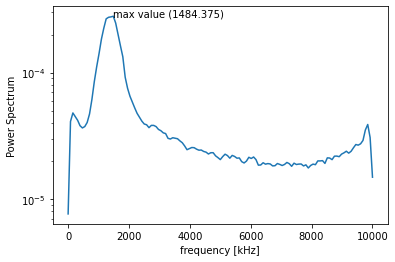

In [47]:
df5 = pd.read_csv(path_mat + ustream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

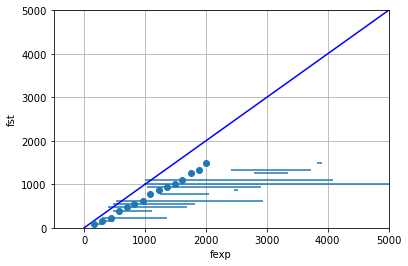

In [48]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  1.01110818
Max Frequency value:  9843.75


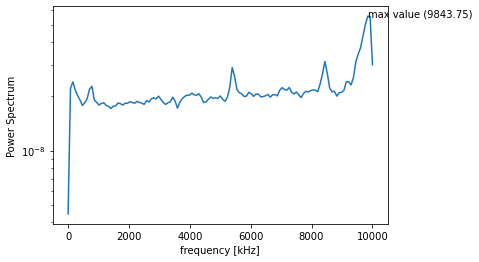


Velocity:  1.383217632
Max Frequency value:  78.125


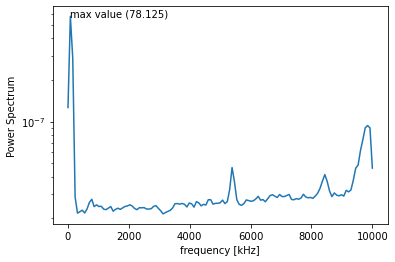


Velocity:  2.2891915160000003
Max Frequency value:  156.25


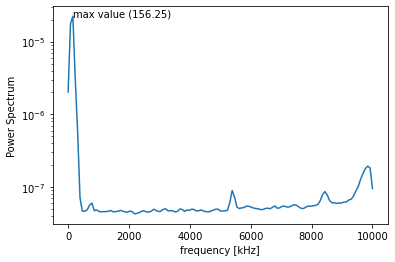


Velocity:  3.2694344240000004
Max Frequency value:  312.5


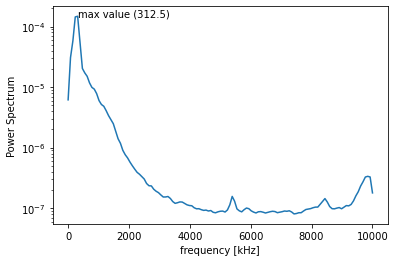


Velocity:  4.11798894
Max Frequency value:  390.625


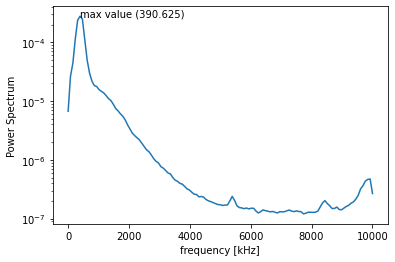


Velocity:  5.048507328
Max Frequency value:  468.75


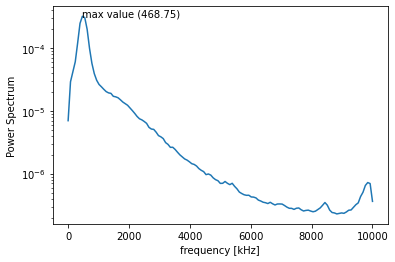


Velocity:  5.98489132
Max Frequency value:  625.0


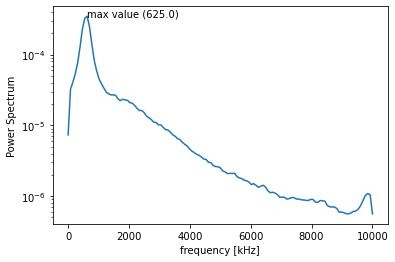


Velocity:  6.963725796
Max Frequency value:  703.125


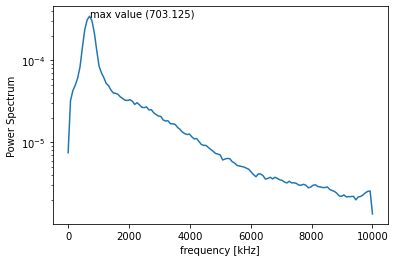


Velocity:  7.868308424
Max Frequency value:  781.25


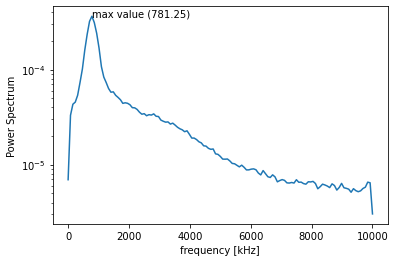


Velocity:  8.772238364
Max Frequency value:  859.375


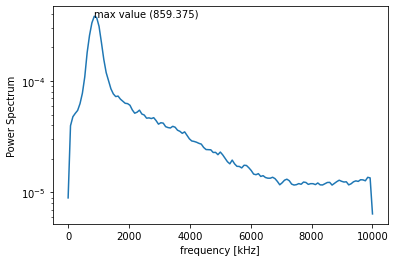


Velocity:  9.747620464
Max Frequency value:  1015.625


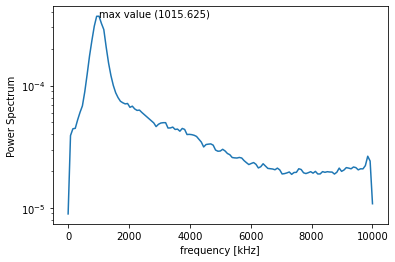


Velocity:  10.601276252
Max Frequency value:  1093.75


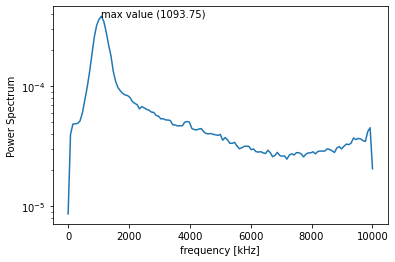


Velocity:  11.478703624
Max Frequency value:  1171.875


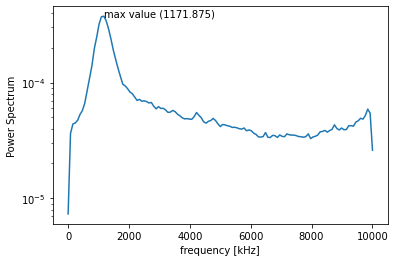


Velocity:  12.451277448
Max Frequency value:  1171.875


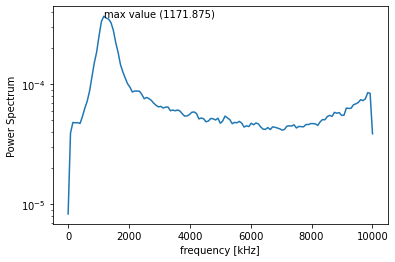


Velocity:  13.38985138
Max Frequency value:  1328.125


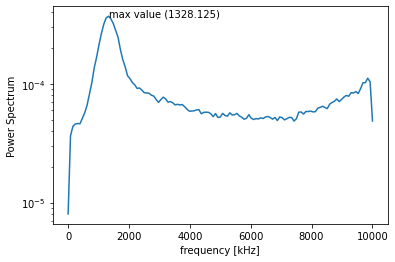


Velocity:  14.303674696
Max Frequency value:  1484.375


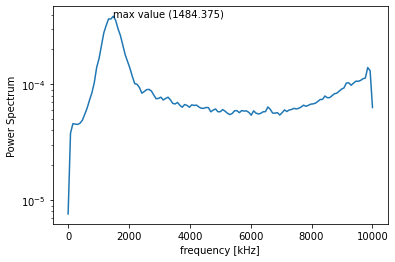

In [49]:
df6 = pd.read_csv(path_mat + ustream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

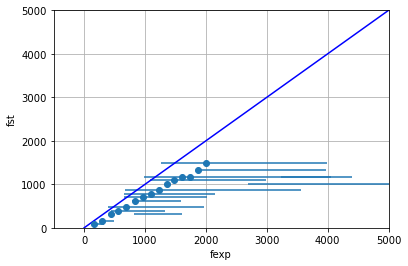

In [50]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.9726425280000001
Max Frequency value:  9843.75


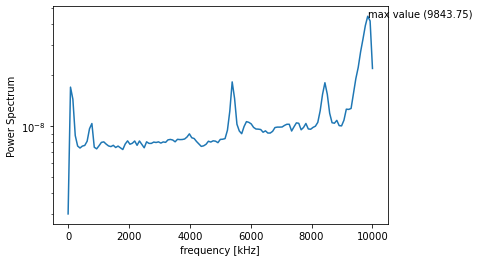


Velocity:  1.387193876
Max Frequency value:  78.125


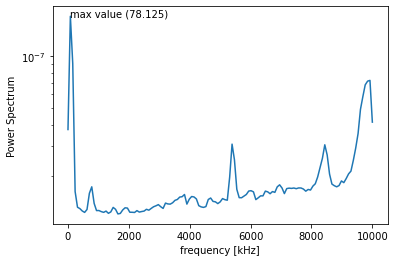


Velocity:  2.356993776
Max Frequency value:  156.25


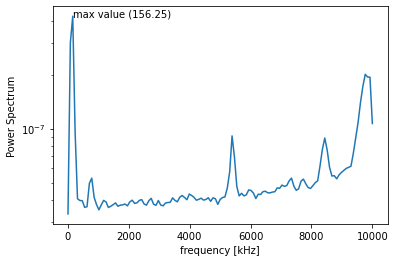


Velocity:  3.2551268159999998
Max Frequency value:  234.375


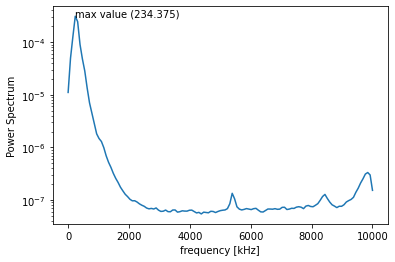


Velocity:  4.119217024
Max Frequency value:  390.625


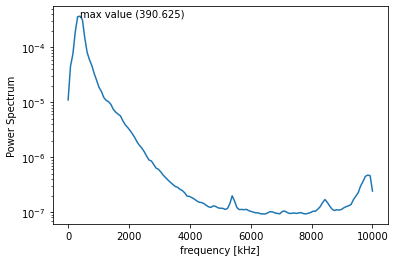


Velocity:  5.020184104
Max Frequency value:  468.75


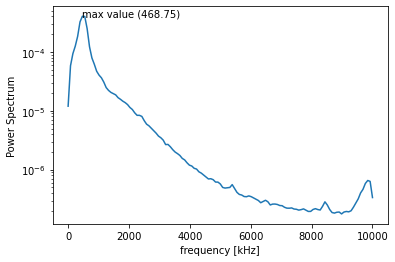


Velocity:  6.06115276
Max Frequency value:  625.0


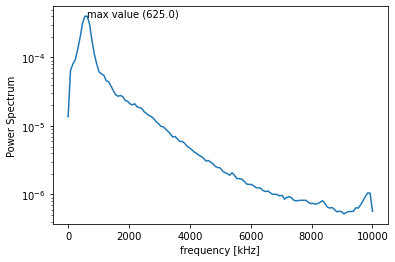


Velocity:  7.017306328000001
Max Frequency value:  703.125


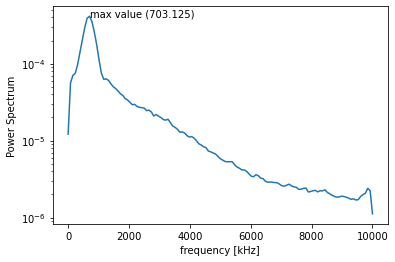


Velocity:  7.771787892
Max Frequency value:  781.25


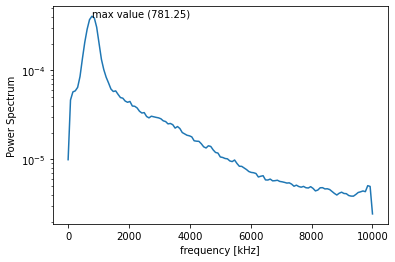


Velocity:  8.782123151999999
Max Frequency value:  859.375


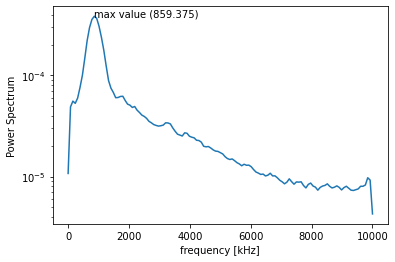


Velocity:  9.676365828
Max Frequency value:  937.5


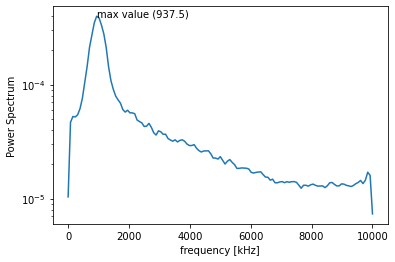


Velocity:  10.624858900000001
Max Frequency value:  1093.75


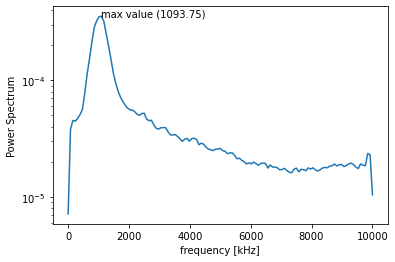


Velocity:  11.471352296000001
Max Frequency value:  1171.875


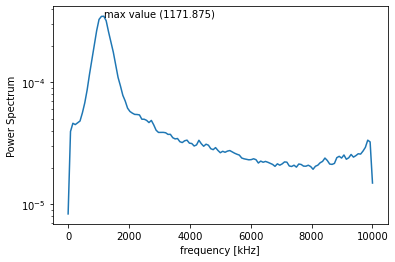


Velocity:  12.421399796000001
Max Frequency value:  1250.0


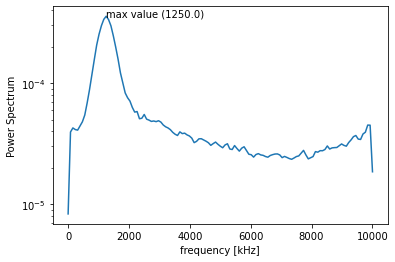


Velocity:  13.416869228000001
Max Frequency value:  1328.125


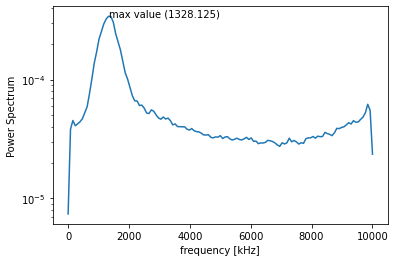


Velocity:  14.431086264
Max Frequency value:  1406.25


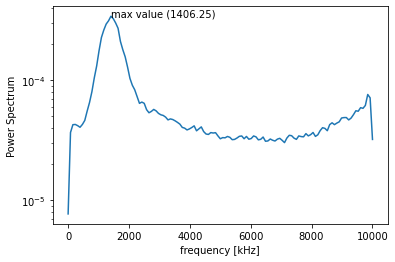

In [51]:
df7 = pd.read_csv(path_mat + ustream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

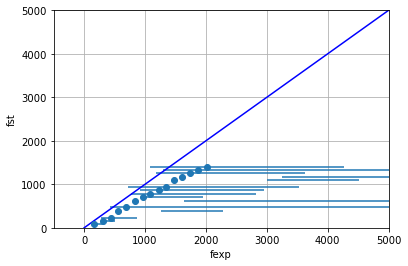

In [52]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.887724384
Max Frequency value:  9843.75


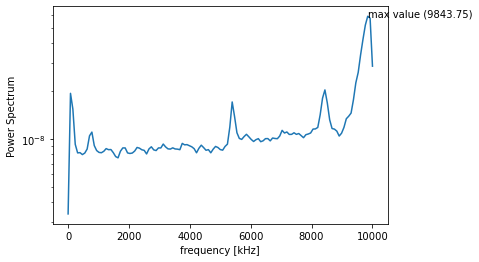


Velocity:  1.3976798240000001
Max Frequency value:  9843.75


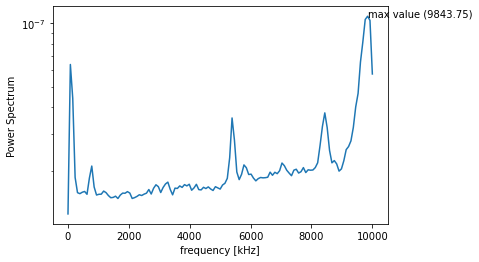


Velocity:  2.31197548
Max Frequency value:  156.25


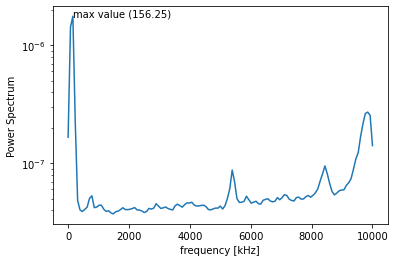


Velocity:  3.276287648
Max Frequency value:  234.375


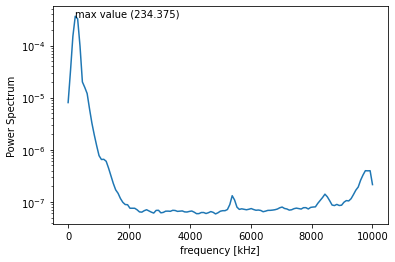


Velocity:  4.086634152
Max Frequency value:  312.5


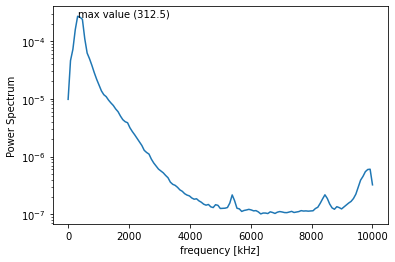


Velocity:  5.0234217800000005
Max Frequency value:  468.75


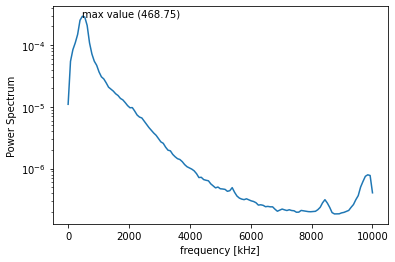


Velocity:  6.065541228000001
Max Frequency value:  625.0


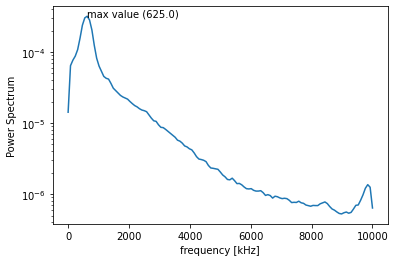


Velocity:  6.975886404000001
Max Frequency value:  703.125


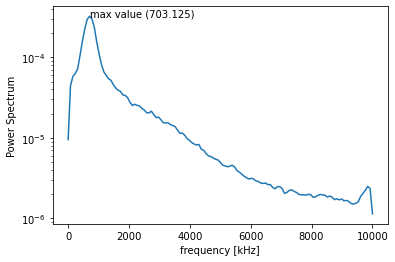


Velocity:  7.848719196
Max Frequency value:  781.25


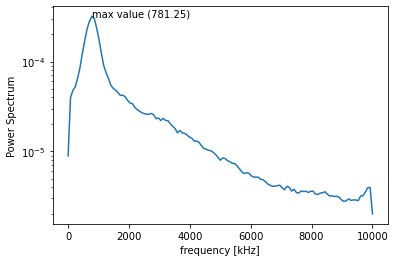


Velocity:  8.853437904
Max Frequency value:  859.375


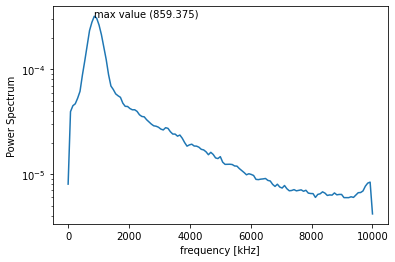


Velocity:  9.756723744
Max Frequency value:  1015.625


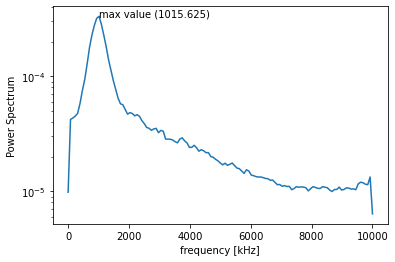


Velocity:  10.674875412
Max Frequency value:  1015.625


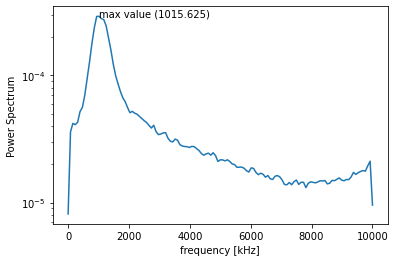


Velocity:  11.551985028
Max Frequency value:  1171.875


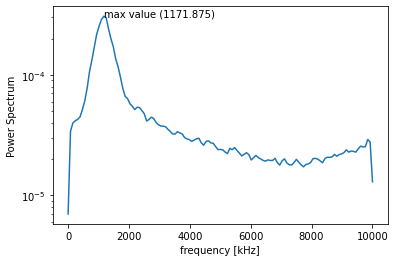


Velocity:  12.463541112
Max Frequency value:  1250.0


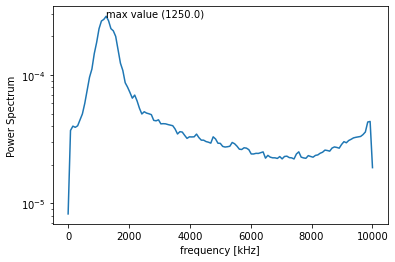


Velocity:  13.543464936000001
Max Frequency value:  1328.125


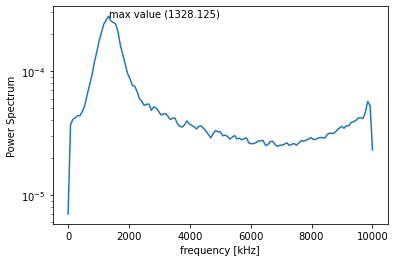


Velocity:  14.457322603999998
Max Frequency value:  1406.25


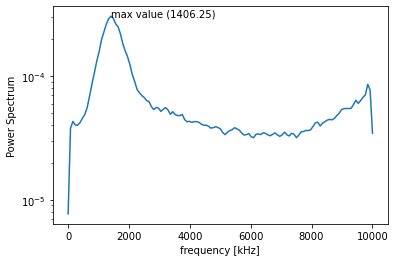

In [53]:
df8 = pd.read_csv(path_mat + ustream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

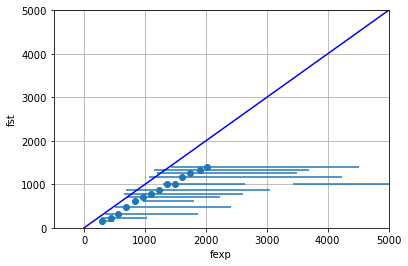

In [54]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

Velocity:  0.9841504480000001
Max Frequency value:  9843.75


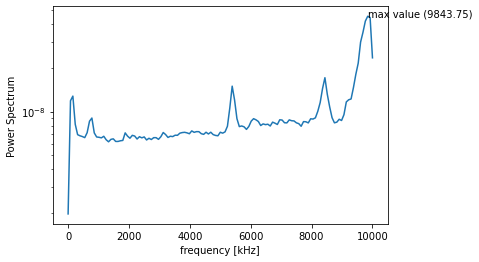


Velocity:  1.374878684
Max Frequency value:  9843.75


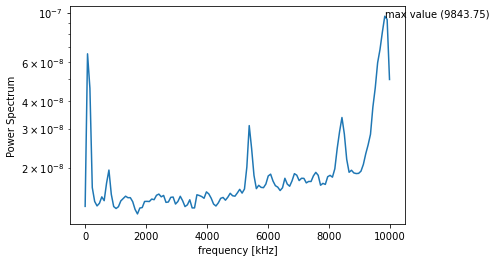


Velocity:  2.354091032
Max Frequency value:  156.25


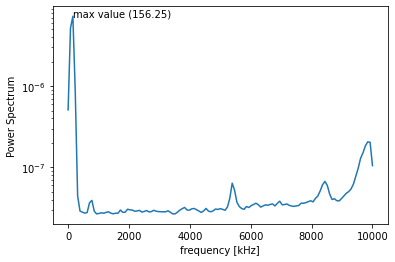


Velocity:  3.265011604
Max Frequency value:  234.375


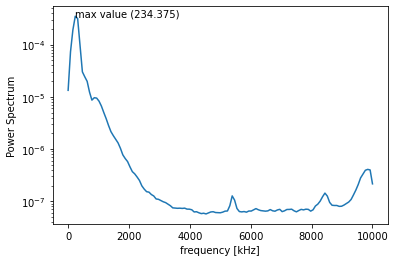


Velocity:  4.08054526
Max Frequency value:  312.5


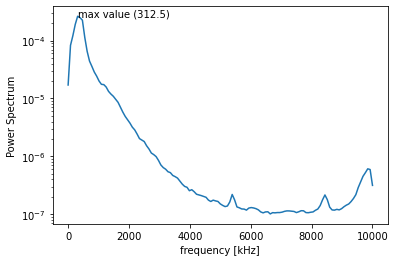


Velocity:  5.018080044
Max Frequency value:  546.875


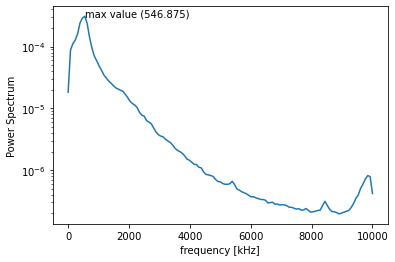


Velocity:  6.100829320000001
Max Frequency value:  625.0


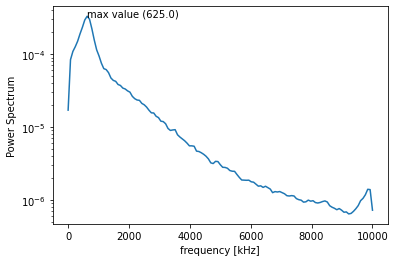


Velocity:  6.969239291999999
Max Frequency value:  781.25


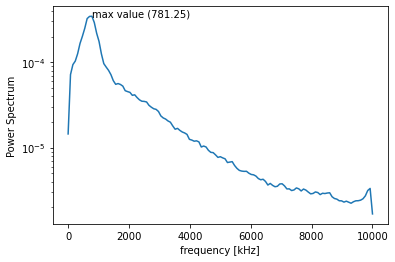


Velocity:  7.862339764
Max Frequency value:  859.375


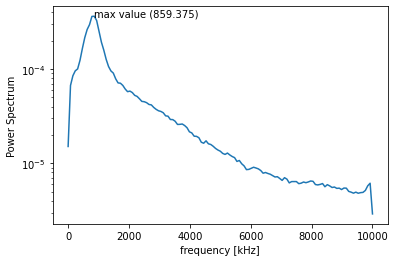


Velocity:  8.758480388
Max Frequency value:  937.5


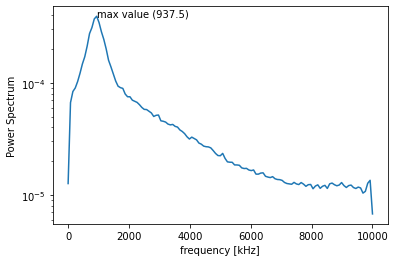


Velocity:  9.740784415999999
Max Frequency value:  1015.625


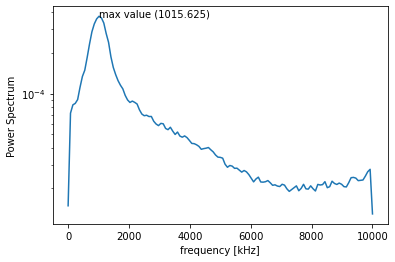


Velocity:  10.68587664
Max Frequency value:  1093.75


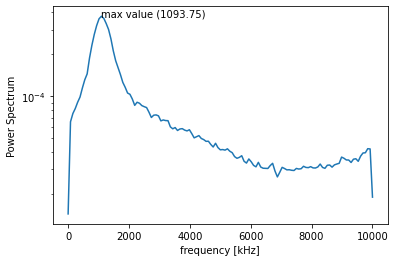


Velocity:  11.574768992
Max Frequency value:  1171.875


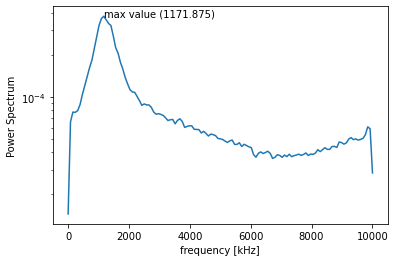


Velocity:  12.461471404
Max Frequency value:  1171.875


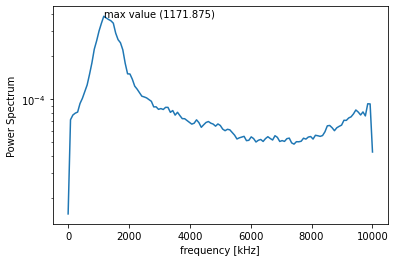


Velocity:  13.423396108
Max Frequency value:  1406.25


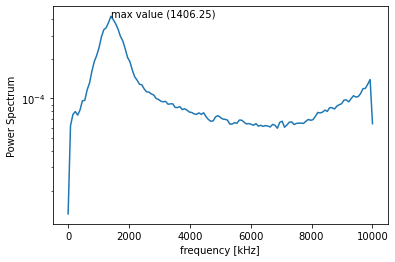


Velocity:  14.336429328000001
Max Frequency value:  1406.25


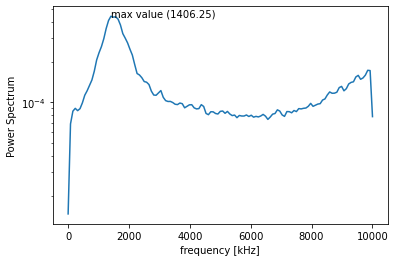

In [55]:
df9 = pd.read_csv(path_mat + ustream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

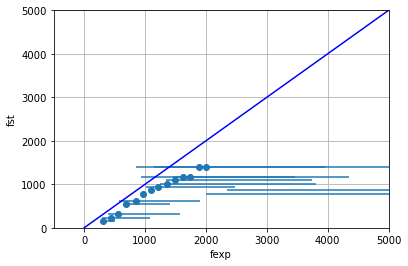

In [56]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

No se realizó debido a que falta una velocidad

## Y9

Velocity:  1.389684396
Max Frequency value:  9843.75


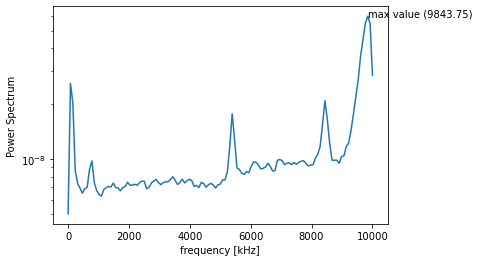


Velocity:  2.282449936
Max Frequency value:  9843.75


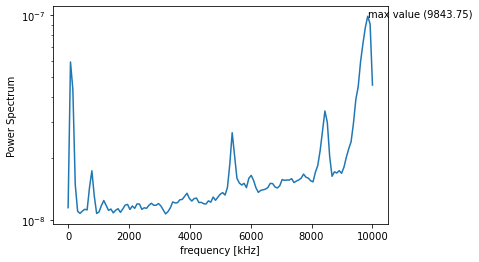


Velocity:  3.298384572
Max Frequency value:  78.125


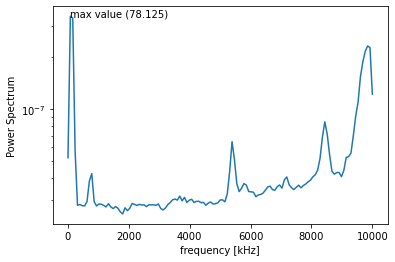


Velocity:  4.1064896079999995
Max Frequency value:  312.5


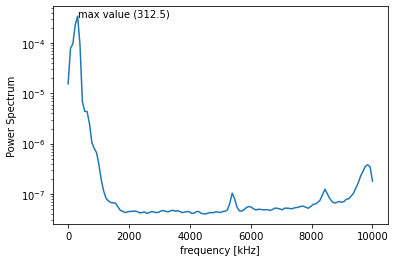


Velocity:  5.112848624
Max Frequency value:  312.5


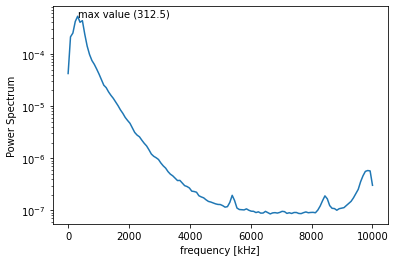


Velocity:  6.063102236
Max Frequency value:  546.875


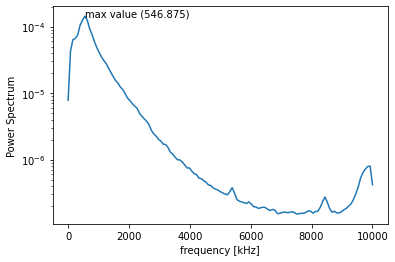


Velocity:  6.921721888
Max Frequency value:  703.125


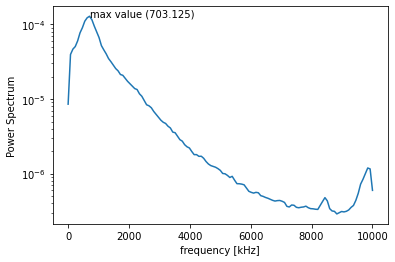


Velocity:  7.849148595999999
Max Frequency value:  781.25


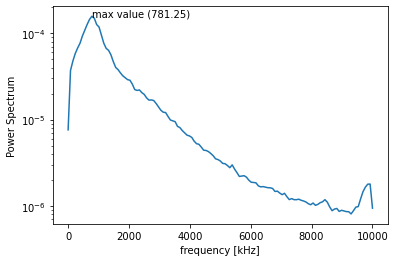


Velocity:  8.756170216
Max Frequency value:  859.375


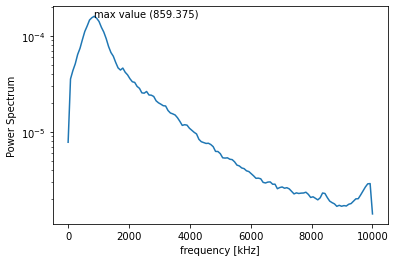


Velocity:  9.681595920000001
Max Frequency value:  1015.625


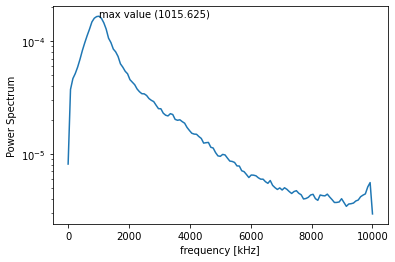


Velocity:  10.657888348
Max Frequency value:  937.5


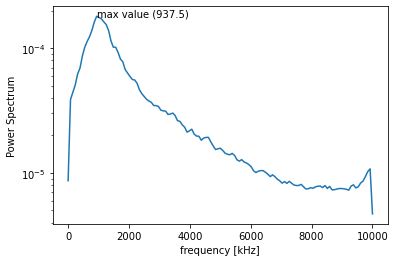


Velocity:  11.507550716
Max Frequency value:  1250.0


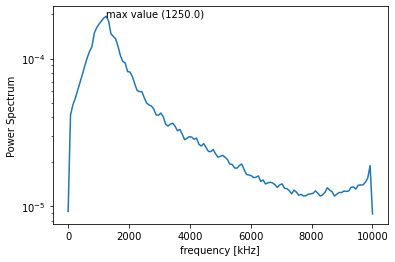


Velocity:  12.435999396000001
Max Frequency value:  1250.0


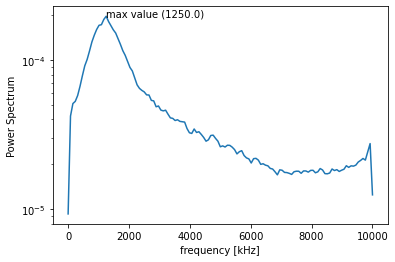


Velocity:  13.356495588
Max Frequency value:  1328.125


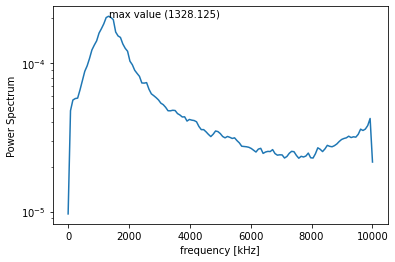


Velocity:  14.370927323999998
Max Frequency value:  1484.375


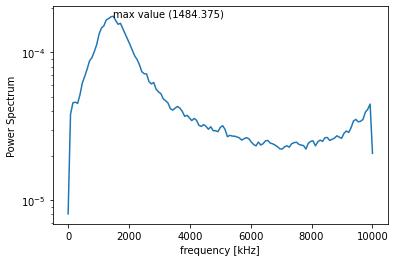


Velocity:  1.035137404
Max Frequency value:  1406.25


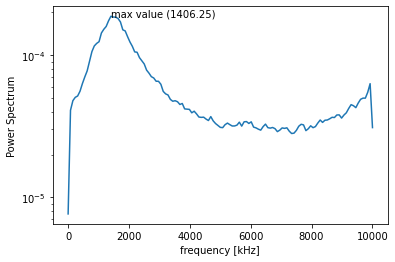

In [57]:
df11 = pd.read_csv(path_mat + ustream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

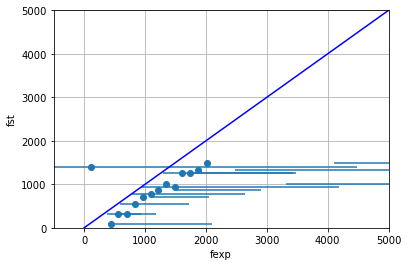

In [58]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

Velocity:  1.356328604
Max Frequency value:  9843.75


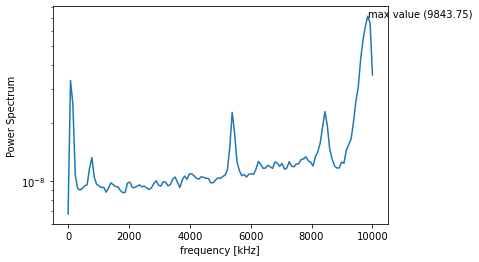


Velocity:  2.362790676
Max Frequency value:  9843.75


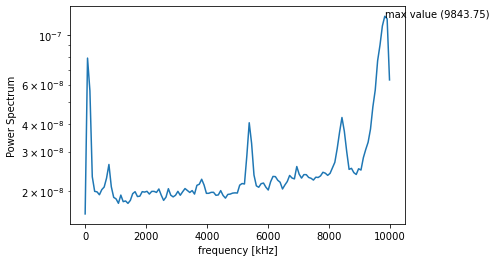


Velocity:  3.2892641159999996
Max Frequency value:  9843.75


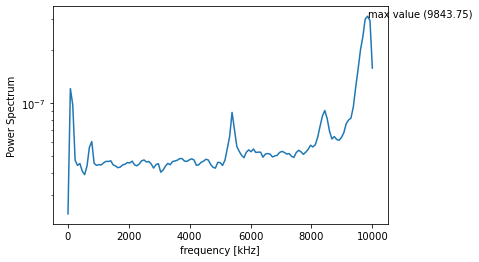


Velocity:  4.117842944
Max Frequency value:  312.5


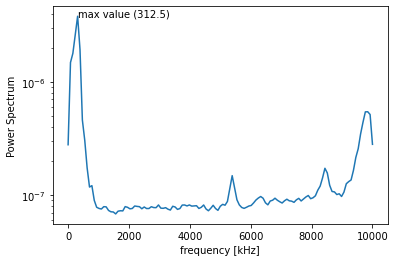


Velocity:  4.995201612
Max Frequency value:  156.25


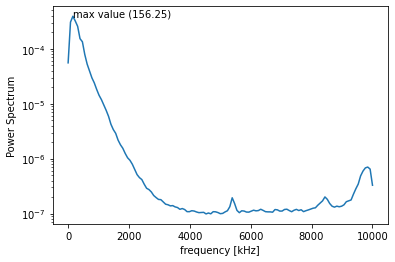


Velocity:  6.044474864000001
Max Frequency value:  156.25


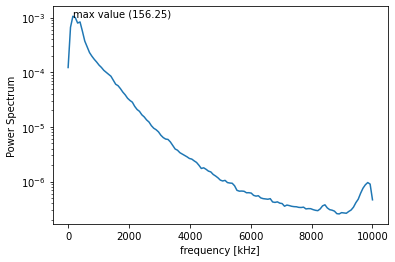


Velocity:  6.952561396
Max Frequency value:  234.375


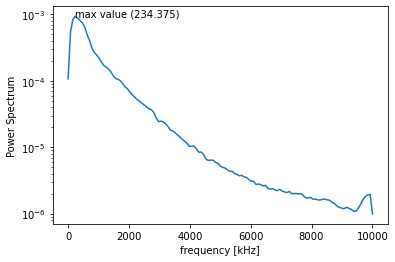


Velocity:  7.8509692520000005
Max Frequency value:  234.375


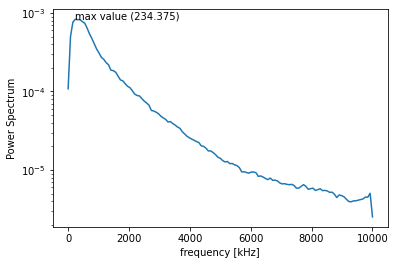


Velocity:  8.755277064
Max Frequency value:  468.75


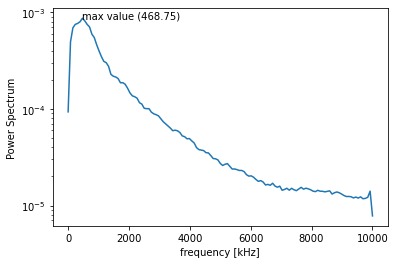


Velocity:  9.727043616
Max Frequency value:  468.75


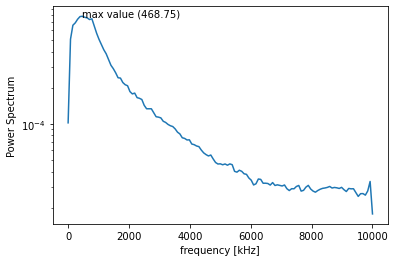


Velocity:  10.632777036
Max Frequency value:  468.75


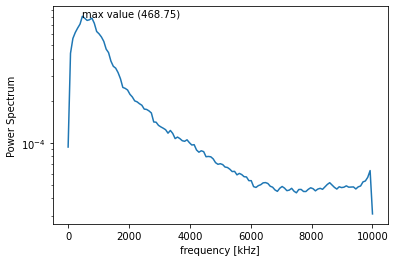


Velocity:  11.5126434
Max Frequency value:  703.125


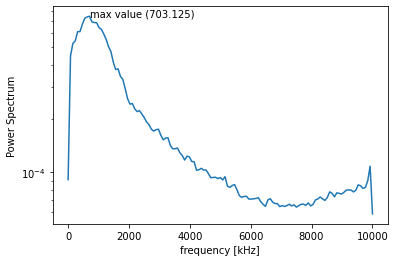


Velocity:  12.535019036000001
Max Frequency value:  937.5


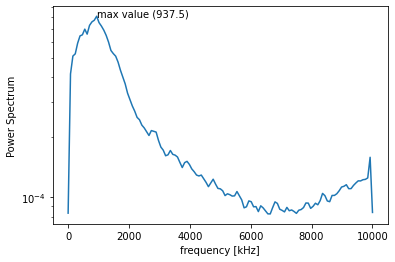


Velocity:  13.467993592000001
Max Frequency value:  1093.75


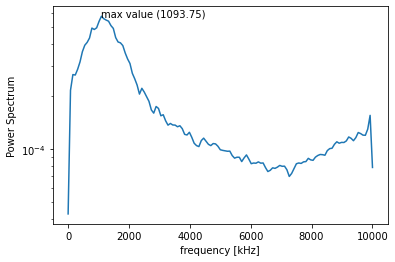


Velocity:  14.369982644
Max Frequency value:  1484.375


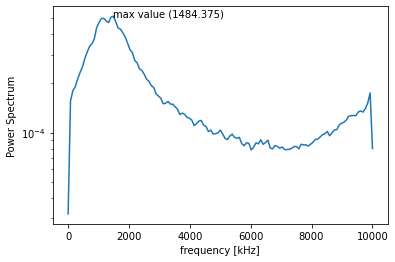

IndexError: single positional indexer is out-of-bounds

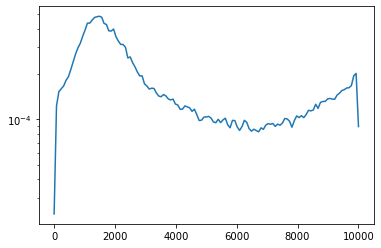

In [59]:
df12 = pd.read_csv(path_mat + ustream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')